# Práctica de la asignatura Machine Learning 101
### *Alumno: David Jiménez Vicente*

-----

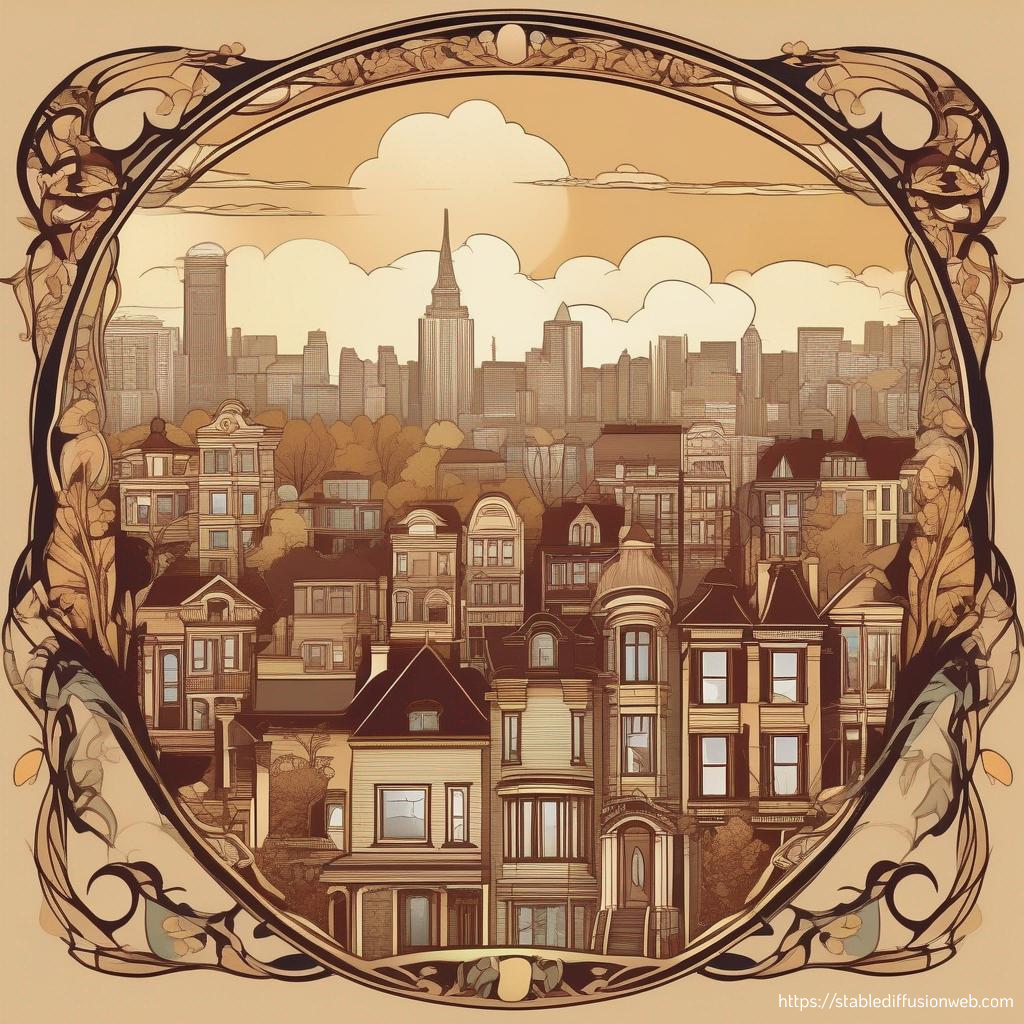

## Enunciado:
#### Se nos pide analizar con técnicas de ML un dataset de AirBnb y crear un modelo para predecir el precio de los alquileres en Madrid.

## Apartado 1: Importación de librerías estándar y de los datos  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

#### · Guardo la url de los datos en una variable para mejorar la manipulación:

In [2]:
url = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"

#### · Usamos Pandas para la carga, EDA y transformación de los datos:

In [3]:
df = pd.read_csv(url, sep=";")

----

## Apartado 2: EDA

####   *Realizaré el EDA y el Preproc antes de hacer la división de los datos entre Train y Test para que ambos datasets tengan estructuras similares. Las mismas directrices de Preprocesado, Selección de características y Transformación, así como Nuevas características se aplicarán a los datos nuevos una vez en producción.*

#### · Empezaremos por un EDA cuantitativo y cualitativo:

In [4]:
# Veamos qué campos tiene el dataset:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [5]:
df.head()

ID                            Listing Url       Scrape ID  \
0  13531067  https://www.airbnb.com/rooms/13531067  20170402075052   
1  15459188  https://www.airbnb.com/rooms/15459188  20170407214050   
2  13184463  https://www.airbnb.com/rooms/13184463  20170407214050   
3  17115175  https://www.airbnb.com/rooms/17115175  20170407214050   
4   6766647   https://www.airbnb.com/rooms/6766647  20170306202425   

  Last Scraped                                             Name  \
0   2017-04-02                              AMSTERDAM, OUD-WEST   
1   2017-04-08                          Paseo De Gracia I (433)   
2   2017-04-08  Rooftop 2 terraces full of art, style and views   
3   2017-04-08            Flat close to Plaza España - Eixample   
4   2017-03-07                   5 Minutes to Downtown, Zilker!   

                                             Summary  \
0  Cozy private room with a double bed in Oud-Wes...   
1  Unique apartment in vibrant neighborhoods, car...   
2  Our place is  In the cross between Born, Barce...   
3  - Comfortable and clean double bedroom, with a...   
4  Get everywhere in minutes! Charming, tradition...   

                                               Space  \
0                                                NaN   
1  Its high ceilings, wooden floors, large window...   
2  The views above Barcelona are unique. The styl...   
3                                                NaN   
4  Located on a large tree-covered lot less than ...   

                                         Description Experiences Offered  \
0  Cozy private room with a double bed in Oud-Wes...                none   
1  Unique apartment in vibrant neighborhoods, car...                none   
2  Our place is  In the cross between Born, Barce...                none   
3  - Comfortable and clean double bedroom, with a...                none   
4  Get everywhere in minutes! Charming, tradition...                none   

                               Neighborhood Overview  ...  \
0                                                NaN  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4  The Tarrytown neighborhood is best known for i...  ...   

  Review Scores Communication Review Scores Location Review Scores Value  \
0                        10.0                   10.0                 8.0   
1                         6.0                   10.0                 8.0   
2                        10.0                   10.0                10.0   
3                        10.0                   10.0                10.0   
4                        10.0                   10.0                10.0   

  License Jurisdiction Names Cancellation Policy  \
0     NaN                NaN            moderate   
1     NaN                NaN              strict   
2     NaN                NaN            flexible   
3     NaN                NaN              strict   
4     NaN                NaN              strict   

  Calculated host listings count Reviews per Month  \
0                            1.0              0.63   
1                           92.0              0.39   
2                            1.0              0.99   
3                            1.0              0.79   
4                            1.0              0.06   

                              Geolocation  \
0    52.36667871194905, 4.865594943841575   
1   41.39161588920901, 2.1681677061165425   
2   41.38136867557121, 2.1808743514708038   
3   41.38600531434205, 2.1433972223397064   
4  30.287123948461037, -97.76816361292846   

                                            Features  
0                               Host Has Profile Pic  
1  Host Has Profile Pic,Host Identity Verified,Is...  
2  Host Has Profile Pic,Host Identity Verified,Is...  
3  Host Has Profile Pic,Host Identity Verified,Is...  
4  Host Has Profile Pic,Host Identity Verified

In [6]:
df.describe(include="all")

ID                            Listing Url     Scrape ID  \
count   1.478000e+04                                  14780  1.478000e+04   
unique           NaN                                  14780           NaN   
top              NaN  https://www.airbnb.com/rooms/13531067           NaN   
freq             NaN                                      1           NaN   
mean    1.028089e+07                                    NaN  2.017037e+13   
std     5.564829e+06                                    NaN  5.667971e+08   
min     1.862800e+04                                    NaN  2.016010e+13   
25%     5.554732e+06                                    NaN  2.017041e+13   
50%     1.133492e+07                                    NaN  2.017041e+13   
75%     1.532631e+07                                    NaN  2.017041e+13   
max     1.910969e+07                                    NaN  2.017062e+13   

       Last Scraped                                Name  \
count         14780                               14779   
unique           37                               14375   
top      2017-04-08  Apartamento en el centro de Madrid   
freq          13627                                  12   
mean            NaN                                 NaN   
std             NaN                                 NaN   
min             NaN                                 NaN   
25%             NaN                                 NaN   
50%             NaN                                 NaN   
75%             NaN                                 NaN   
max             NaN                                 NaN   

                                                  Summary  \
count                                               14189   
unique                                              13289   
top     Unique apartment in vibrant neighborhoods, car...   
freq                                                   64   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    Space  \
count                                               10888   
unique                                              10174   
top     Los Apartamentos Good Stay Prado se encuentran...   
freq                                                   29   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              Description Experiences Offered  \
count                                               14774               14780   
unique                                              14281                   5   
top     Es un piso con 6 habitaciones de las que 5  ha...                none   
freq                                                   19               14763   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                        

In [7]:
# Guardaré la extensión original del dataset para posteriores cálculos
len_original = len(df)

#### *· Tiene demasiadas características para poder extraer información rápidamente. Se necesita hacer una primera selección de ecaracterísticas.*
#### · Empezaré por comprobar si todos los datos son de pisos de Madrid:

In [8]:
# Buscaremos los valores únicos en el campo "City"
df.City.sort_values().unique()

array(['Alaró', 'Albert Park', 'Alcudia', 'Alcúdia', 'Algaida',
       'Amsterdam', 'Andratx', 'Antwerpen', 'Aravaca', 'Aravaca (Madrid)',
       'Ariany', 'Athens', 'Athina', 'Austin', 'Balearic Islands',
       'Ballsbridge', 'Barcelona', 'Berlin', 'Berlín', 'Berowra Waters',
       'Betlem', 'Beverly Hills', 'Biniamar', 'Binissalem',
       'Binissalem-Mallorca DO', 'Boadilla del Monte', 'Bondi',
       'Bondi Beach', 'Bondi Junction', 'Boston', 'Brent', 'Bronx',
       'Brooklyn', 'Brunswick', 'Brussel', 'Bruxelles', 'Bunyola',
       'Búger', 'Caimari', 'Cala Agulla', 'Cala Anguila-Cala Mendia',
       'Cala Ferrera', 'Cala Magrana', 'Cala Murada', 'Cala Pi',
       'Cala Ratjada', 'Cala Santanyí', 'Calvià', 'Campanet', 'Campos',
       'Can Pastilla', 'Can Picafort', 'Centro', 'Centro, Madrid',
       'Chelsea, London', 'Chicago', 'Chiva', 'Chueca', 'Chueca, Madrid',
       'Clongriffin', 'Cologny', 'Colonia Sant Pere',
       'Colonia de Sant Pere', 'Colònia de Sant Jordi',
    

#### *Se aprecian 246 nombres de ciudad distintos. Sólo debería haber uno. Además, hay varias maneras de escribir Madrid, pero todas parecen contener los caracteres "mad".*
#### *También hay barrios de Madrid inscritos en el campo Ciudad. Haré un primer filtrado con eso.*

In [9]:
# Seleccionamos por los caracteres "mad" o algunos nombres que pertenecen a Madrid
df_madrid = df[df.City.str.contains("Mad") | df.City.str.contains("mad") | df.City.str.contains("MAD") | df.City.str.contains("Aravaca") | df.City.str.contains("villa verde bajo") | df.City.str.contains("Chueca") | df.City.str.contains("Ventas") | df.City.str.contains("Boadilla") | df.City.str.contains("Elipa") | df.City.str.contains("Pozuelo") | df.City.str.contains("de Henares") | df.City.str.contains("Delicias")]
df_madrid.City.sort_values().unique()

array(['Aravaca', 'Aravaca (Madrid)', 'Boadilla del Monte',
       'Centro, Madrid', 'Chueca', 'Chueca, Madrid',
       'Comunidad de Madrid', 'Delicias', 'Delicias-Madrid', 'La Elipa',
       'MADRID', 'Madid', 'Madri', 'Madrid',
       'Madrid, Comunidad de Madrid, ES',
       'Madrid, Comunidad de Madrid, ESPANA',
       'Madrid, Vallecas (Fontarrón)', 'Pozuelo', 'Pozuelo de Alarcón',
       'San Fernando de Henares', 'Ventas', 'las matas  madrid', 'madrid',
       'villa verde bajo'], dtype=object)

In [10]:
len_madrid0 = len(df_madrid)

### Filtrado de características previas al Split, usando conocimiento del dominio:

Vamos a eliminar algunas columnas que no deberían afectar al precio a priori, antes del análisis:  
- Eliminaré la columna "Ciudad", ya que sólo hay una en todo el dataset.  
- Aquellas que hablan del propietario, fotos, urls, IDs, o son descripciones de texto.
- La calle tampoco la usaré, ya que hay calles que pueden ser de varios quilómetros y abarcar un montón de precios diferentes al atravesar varios barrios.
- El Zipcode lo olimino porque está muy relacionado con los barrios y resultará redundante.
- En cuanto a los barrios sólo me quedaré el barrio general al ser muy redundantes las tres variables de barrio, y conservaré los zipcodes, a falta de analizar su correlación con los barrios.
- Demarcaciones políticas tampoco, ni datos de geolocalización, ya que nos limitamos a Madrid.
- También eliminaré características redundantes de precios por semana, mes para quedarn os con el precio diario.
- La disponibilidad podría afectar al precio, ya que si es muy demandado el propietario podría elevar los precios, así que me centraré en un indicador de disponibilidad de 90 días como indicador medio de lo demandado que está un piso.
- Así mismo, nos da igual cuándo se han extraído los datos de la web.
- En cuanto a las valoraciones, sólo me interesará el rating general.
- Hay varias features de tipo administrativo que se eliminarán del final de las columnas.

In [11]:
df_madrid = df_madrid.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 'Experiences Offered', 'Neighborhood Overview','Notes', 'Transit', 'Access', 'Interaction', 'House Rules','Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url','Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location','Host About', 'Host Response Time', 'Host Response Rate','Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url','Host Neighbourhood', 'Host Listings Count','Host Total Listings Count', 'Host Verifications', 'Street', 'Market','Smart Location', 'Country Code', 'Country', 'City', 'Zipcode', 'State','Latitude', 'Longitude', 'Weekly Price','Monthly Price', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated','Has Availability', 'Availability 30', 'Availability 60', 'Availability 365', 'Calendar last Scraped','Number of Reviews', 'First Review', 'Last Review', 'Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 'Review Scores Location','Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count','Reviews per Month', 'Geolocation', 'Features'], axis=1)

In [12]:
# Comprobamos el resultado
df_madrid.head()

Neighbourhood        Neighbourhood Cleansed Neighbourhood Group Cleansed  \
63    Villaverde                      Butarque                   Villaverde   
64    Villaverde                   Los Angeles                   Villaverde   
65     Vicálvaro  Casco Histórico de Vicálvaro                    Vicálvaro   
66     Vicálvaro  Casco Histórico de Vicálvaro                    Vicálvaro   
67     Vicálvaro  Casco Histórico de Vicálvaro                    Vicálvaro   

   Property Type        Room Type  Accommodates  Bathrooms  Bedrooms  Beds  \
63     Apartment     Private room             1        1.0       1.0   1.0   
64     Apartment     Private room             2        NaN       1.0   1.0   
65     Apartment     Private room             1        2.0       2.0   2.0   
66          Loft  Entire home/apt             4        1.5       1.0   3.0   
67     Apartment  Entire home/apt             5        1.0       2.0   4.0   

    Bed Type                                          Amenities  Square Feet  \
63  Real Bed  TV,Internet,Wireless Internet,Pool,Free parkin...          NaN   
64  Real Bed                                                NaN          0.0   
65  Real Bed  TV,Wireless Internet,Kitchen,Pets allowed,Door...          NaN   
66  Real Bed  TV,Internet,Wireless Internet,Air conditioning...          0.0   
67  Real Bed  TV,Kitchen,Free parking on premises,Smoking al...          NaN   

    Price  Security Deposit  Cleaning Fee  Guests Included  Extra People  \
63   18.0               NaN           NaN                1             0   
64  190.0               NaN           NaN                1             0   
65   23.0               NaN          10.0                1             0   
66   39.0             450.0          20.0                3             8   
67   45.0             100.0          40.0                4            15   

    Availability 90  Review Scores Rating Cancellation Policy  
63               83                  93.0            flexible  
64               90                   NaN            flexible  
65               58                  80.0            flexible  
66               60                  94.0            moderate  
67                8                   NaN            flexible

In [13]:
df_madrid=df_madrid[df_madrid["Price"]<= 250]

#### · De cara a añadir una cierta localización que pueda afectar al precio, elegiré una de las 3 características de barrios que hay:

In [14]:
# Revisemos los 3 campos de barrios
df_madrid[["Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed"]].describe(include="all")

Neighbourhood Neighbourhood Cleansed Neighbourhood Group Cleansed
count           8651                  13085                        13085
unique            65                    126                           21
top         Malasaña            Embajadores                       Centro
freq             888                   1840                         6692

#### *El campo "Neighbourhood" tiene una cuenta bastante inferior a los otros, lo que indica que tiene muchos valores NA. Revisemoslo:*

In [15]:
df_cont_na = df_madrid[["Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed"]].info()
#df_cont_na.loc["Total_nas"] = df_cont_na.sum(axis=0)
df_cont_na

<class 'pandas.core.frame.DataFrame'>
Index: 13085 entries, 63 to 14769
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neighbourhood                 8651 non-null   object
 1   Neighbourhood Cleansed        13085 non-null  object
 2   Neighbourhood Group Cleansed  13085 non-null  object
dtypes: object(3)
memory usage: 408.9+ KB


In [16]:
df_madrid["Neighbourhood Cleansed"].nunique()

126

In [17]:
df_madrid["Neighbourhood Group Cleansed"].nunique()

21

#### *El campo "Neighbourhood" se eliminará al tener tanta información no válida. Nos quedaremos los otros dos indicadores de barrio y lo analizaremos tras el split.*

In [18]:
# Eliminamos las columnas:
df_madrid = df_madrid.drop(["Neighbourhood"], axis=1)
df_madrid.head()

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
63                      Butarque                   Villaverde     Apartment   
64                   Los Angeles                   Villaverde     Apartment   
65  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
66  Casco Histórico de Vicálvaro                    Vicálvaro          Loft   
67  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   

          Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
63     Private room             1        1.0       1.0   1.0  Real Bed   
64     Private room             2        NaN       1.0   1.0  Real Bed   
65     Private room             1        2.0       2.0   2.0  Real Bed   
66  Entire home/apt             4        1.5       1.0   3.0  Real Bed   
67  Entire home/apt             5        1.0       2.0   4.0  Real Bed   

                                            Amenities  Square Feet  Price  \
63  TV,Internet,Wireless Internet,Pool,Free parkin...          NaN   18.0   
64                                                NaN          0.0  190.0   
65  TV,Wireless Internet,Kitchen,Pets allowed,Door...          NaN   23.0   
66  TV,Internet,Wireless Internet,Air conditioning...          0.0   39.0   
67  TV,Kitchen,Free parking on premises,Smoking al...          NaN   45.0   

    Security Deposit  Cleaning Fee  Guests Included  Extra People  \
63               NaN           NaN                1             0   
64               NaN           NaN                1             0   
65               NaN          10.0                1             0   
66             450.0          20.0                3             8   
67             100.0          40.0                4            15   

    Availability 90  Review Scores Rating Cancellation Policy  
63               83                  93.0            flexible  
64               90                   NaN            flexible  
65               58                  80.0            flexible  
66               60                  94.0            moderate  
67                8                   NaN            flexible

#### · Volvamos a resumir el dataset restante:

In [19]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13085 entries, 63 to 14769
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13085 non-null  object 
 1   Neighbourhood Group Cleansed  13085 non-null  object 
 2   Property Type                 13085 non-null  object 
 3   Room Type                     13085 non-null  object 
 4   Accommodates                  13085 non-null  int64  
 5   Bathrooms                     13040 non-null  float64
 6   Bedrooms                      13062 non-null  float64
 7   Beds                          13039 non-null  float64
 8   Bed Type                      13085 non-null  object 
 9   Amenities                     12986 non-null  object 
 10  Square Feet                   512 non-null    float64
 11  Price                         13085 non-null  float64
 12  Security Deposit              5571 non-null   float64
 13  Clean

#### · Todas las variables Object que quedan parecen categóricas, menos "Amenities". El campo "Amenities" podría aportar información al modelo a pesar de ser string. Si tiene más o menos comodidades podría afectar al precio al subir el nivel del apartamento. Vamos a estudiarla:

#### *Revisemos primero cuántos NaN tiene:*

In [20]:
print(f"Hay {sum(df_madrid.Amenities.isna())} filas con NA en 'Amenities', eso es un {sum(df_madrid.Amenities.isna()) / len(df_madrid) * 100}% de los datos")


Hay 99 filas con NA en 'Amenities', eso es un 0.7565915170042032% de los datos


#### *Podría usarse. Son pocos nulos, y si los sustituímos por la media de cantidad de Amenities, podría valer para el modelo.*  
#### · Vamos a crear una nueva característica que se usará en todos los datasets que entren: "Amenities Count". Será cuantitativa, no categórica. Queremos saber si la cantidad de comodidades afecta al precio.

In [21]:
# Reharemos el índice de nuevo para que empiece desde 0 secuencialmente:
df_madrid.reset_index(drop=True, inplace=True)

In [22]:
df_madrid.Amenities.head(30)

0     TV,Internet,Wireless Internet,Pool,Free parkin...
1                                                   NaN
2     TV,Wireless Internet,Kitchen,Pets allowed,Door...
3     TV,Internet,Wireless Internet,Air conditioning...
4     TV,Kitchen,Free parking on premises,Smoking al...
5     TV,Wireless Internet,Free parking on premises,...
6     TV,Internet,Wireless Internet,Kitchen,Smoking ...
7     Wireless Internet,Air conditioning,Doorman,Pet...
8     Wireless Internet,Air conditioning,Pool,Kitche...
9     Smoking allowed,translation missing: en.hostin...
10    Wireless Internet,Kitchen,Heating,Washer,First...
11    TV,Cable TV,Internet,Wireless Internet,Wheelch...
12    TV,Internet,Wireless Internet,Air conditioning...
13    Internet,Wireless Internet,Air conditioning,Ki...
14    Smoking allowed,Pets allowed,Suitable for even...
15    Kitchen,Breakfast,Heating,Family/kid friendly,...
16    Internet,Wireless Internet,Wheelchair accessib...
17    TV,Internet,Wireless Internet,Air conditio

*Vemos que en el campo 9 hay valores extraños:*

In [23]:
df_madrid.Amenities[9]

'Smoking allowed,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50'

#### *Encontramos items en los listados de Amenities que son errores. Los eliminaremos del dataset de entrada al hacer el siguiente loop.*

In [24]:
# Haré un loop para crear una columna en el dataset que tenga el conteo de cuántas comodidades hay en cada una, ya que parecen estar separados por comas:
#counter=0
for idx, row in df_madrid.Amenities.items():
    counter=0
    if not pd.isna(row):
        for word in row.split(sep=","):
            if "translation missing" not in word:
                counter += 1
    df_madrid.loc[idx,"Amenities Count"] = int(counter)
    

In [25]:
# Pondré el tipo correcto a la columna, que resulta tras el loop en un float. También eliminaré la columna Amenities, que ya no vamos a usar.
df_madrid["Amenities Count"] = df_madrid["Amenities Count"].astype(int)
df_madrid = df_madrid.drop("Amenities", axis=1)
df_madrid.head(10)

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
0                      Butarque                   Villaverde     Apartment   
1                   Los Angeles                   Villaverde     Apartment   
2  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
3  Casco Histórico de Vicálvaro                    Vicálvaro          Loft   
4  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
5  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
6                      Simancas        San Blas - Canillejas     Apartment   
7                      Simancas        San Blas - Canillejas     Apartment   
8                         Rejas        San Blas - Canillejas     Apartment   
9                      Salvador        San Blas - Canillejas     Apartment   

         Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
0     Private room             1        1.0       1.0   1.0  Real Bed   
1     Private room             2        NaN       1.0   1.0  Real Bed   
2     Private room             1        2.0       2.0   2.0  Real Bed   
3  Entire home/apt             4        1.5       1.0   3.0  Real Bed   
4  Entire home/apt             5        1.0       2.0   4.0  Real Bed   
5     Private room             1        1.0       1.0   1.0  Real Bed   
6     Private room             2        1.0       1.0   1.0  Real Bed   
7     Private room             1        1.0       1.0   1.0  Real Bed   
8     Private room             2        1.0       1.0   1.0  Real Bed   
9     Private room             2        1.0       1.0   1.0  Real Bed   

   Square Feet  Price  Security Deposit  Cleaning Fee  Guests Included  \
0          NaN   18.0               NaN           NaN                1   
1          0.0  190.0               NaN           NaN                1   
2          NaN   23.0               NaN          10.0                1   
3          0.0   39.0             450.0          20.0                3   
4          NaN   45.0             100.0          40.0                4   
5          NaN   16.0             250.0           5.0                1   
6          NaN   18.0               NaN           NaN                1   
7          NaN   15.0               NaN           NaN                1   
8          NaN   40.0               NaN           NaN                2   
9          NaN   30.0               NaN           NaN                2   

   Extra People  Availability 90  Review Scores Rating Cancellation Policy  \
0             0               83                  93.0            flexible   
1             0               90                   NaN            flexible   
2             0               58                  80.0            flexible   
3             8               60                  94.0            moderate   
4            15                8                   NaN            flexible   
5             0                0                  85.0            moderate   
6             8               25                 100.0            flexible   
7             0               18                  98.0            moderate   
8             0                0                   NaN            flexible   
9            10               89                   NaN            flexible   

   Amenities Count  
0               14  
1                0  
2               17  
3               19  
4               15  
5                5  
6               12  
7               10  
8               10  
9                1

#### · Repasemos el dataset de nuevo:

In [26]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13085 entries, 0 to 13084
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13085 non-null  object 
 1   Neighbourhood Group Cleansed  13085 non-null  object 
 2   Property Type                 13085 non-null  object 
 3   Room Type                     13085 non-null  object 
 4   Accommodates                  13085 non-null  int64  
 5   Bathrooms                     13040 non-null  float64
 6   Bedrooms                      13062 non-null  float64
 7   Beds                          13039 non-null  float64
 8   Bed Type                      13085 non-null  object 
 9   Square Feet                   512 non-null    float64
 10  Price                         13085 non-null  float64
 11  Security Deposit              5571 non-null   float64
 12  Cleaning Fee                  7727 non-null   float64
 13  G

#### *De manera muy inconveniente, la variable de "Square Feet" casi no tiene registros. No podremos usarla por la falta de información y la imposibilidad de imputar lógicamente los datos faltantes. Esto se podrá revisar en el futuro si los métodos de recogida de datos se modifican para que esta variable sea fiable. Aún así, vamos a revisarlo un momento:*

Estudio la viabilidad de usar los datos existentes para inferir una media por barrio:

In [27]:
# Haré un diccionario para analizar qué tanto por ciento de valores no Nan hay en cada barrio:
dicc_feet = {}
for i in df_madrid["Neighbourhood Group Cleansed"].unique():
    dicc_feet[i] = {}
    dicc_feet[i]["Totales"] = len(df_madrid[df_madrid["Neighbourhood Group Cleansed"]==i])
    dicc_feet[i]["No_Na"] = 0
    dicc_feet[i]["Porcentaje_No_Na"] = 0
for idx, barrio in df_madrid["Neighbourhood Group Cleansed"].items():
    counter = 0
    if not pd.isna(df_madrid.loc[idx, "Square Feet"]):
        dicc_feet[barrio]["No_Na"] += 1
    dicc_feet[barrio]["Porcentaje_No_Na"] = round(dicc_feet[barrio]["No_Na"]/dicc_feet[barrio]["Totales"]*100,2)

In [28]:
dicc_feet

{'Villaverde': {'Totales': 82, 'No_Na': 3, 'Porcentaje_No_Na': 3.66},
 'Vicálvaro': {'Totales': 34, 'No_Na': 4, 'Porcentaje_No_Na': 11.76},
 'San Blas - Canillejas': {'Totales': 117,
  'No_Na': 10,
  'Porcentaje_No_Na': 8.55},
 'Carabanchel': {'Totales': 355, 'No_Na': 8, 'Porcentaje_No_Na': 2.25},
 'Usera': {'Totales': 143, 'No_Na': 1, 'Porcentaje_No_Na': 0.7},
 'Puente de Vallecas': {'Totales': 221, 'No_Na': 6, 'Porcentaje_No_Na': 2.71},
 'Moratalaz': {'Totales': 74, 'No_Na': 2, 'Porcentaje_No_Na': 2.7},
 'Latina': {'Totales': 379, 'No_Na': 14, 'Porcentaje_No_Na': 3.69},
 'Chamberí': {'Totales': 937, 'No_Na': 29, 'Porcentaje_No_Na': 3.09},
 'Fuencarral - El Pardo': {'Totales': 150,
  'No_Na': 4,
  'Porcentaje_No_Na': 2.67},
 'Moncloa - Aravaca': {'Totales': 415, 'No_Na': 12, 'Porcentaje_No_Na': 2.89},
 'Ciudad Lineal': {'Totales': 306, 'No_Na': 8, 'Porcentaje_No_Na': 2.61},
 'Hortaleza': {'Totales': 180, 'No_Na': 3, 'Porcentaje_No_Na': 1.67},
 'Centro': {'Totales': 6692, 'No_Na': 312,

Definitivamente, no se puede usar. En el mejor de los casos de barrios, sólo un 11% de los pisos tiene valores representativos, aunque la tendencia es entre un 2 y un 4%. Eso no puede definir la media de toda la población de pisos de cada barrio.  
Elimino la columna:

In [29]:
df_madrid = df_madrid.drop("Square Feet", axis=1)

#### · Hablemos de las variables categóricas: todas las que son object. Vamos a revisarlas:

In [30]:
df_madrid[["Neighbourhood Group Cleansed", "Neighbourhood Cleansed", "Property Type", "Room Type", "Bed Type", "Cancellation Policy"]].describe()

Neighbourhood Group Cleansed Neighbourhood Cleansed Property Type  \
count                         13085                  13085         13085   
unique                           21                    126            22   
top                          Centro            Embajadores     Apartment   
freq                           6692                   1840         10785   

              Room Type  Bed Type Cancellation Policy  
count             13085     13085               13085  
unique                3         5                   5  
top     Entire home/apt  Real Bed              strict  
freq               7775     12790                4905

#### *Efectivamente son categóricas, se puede deducir del número de valores únicos. Vamos a codificarlas casi todas con Mean Encoder tras el split, pero ahora codificaré "Cancellation Policy" con un LabelEncoding Ordinal, porque esta variable sí que es más restrictiva según cambia su categoría, desde un nivel 0 "Flexible" hasta un nivel 4 super estricto 60 días:*

In [31]:
from sklearn.preprocessing import LabelEncoder
le_canc = LabelEncoder()
df_madrid["Cancellation Policy"] = le_canc.fit_transform(df_madrid["Cancellation Policy"])
listado_canc = [(idx,clase) for idx, clase in enumerate(le_canc.classes_)]
listado_canc

[(0, 'flexible'),
 (1, 'moderate'),
 (2, 'strict'),
 (3, 'super_strict_30'),
 (4, 'super_strict_60')]

Efectivamente, según crece el índice crece el nivel de restricción.

#### · Hay dos variables, El depósito de seguro y la Tasa de limpieza, que podrían ser importantes. Aunque las analizaré bien tras el Split, voy a hacer un pequeño EDA gráfico de ambas para saber si a medida que aumenta el precio de alquiler, aumenta la variable. Si parecen tener relación lineal, las usaré después del split, y si parecen aleatorias, las convertiré antes del split a categóricas de Si o No presentes, para estudiar tras el split el hecho de que afecte al precio si hay o no hay tasas.

*-Los propietarios han de escoger al publicar el piso en AirBnb si pedir o no pedir un "Cleaning Fee" y un "Security Deposit", y en el caso de pedirlo had de especificar la cantidad. Es por eso que para estas dos variables, si hay NaNs, significa que el propietario ha decidido no pedirlo, por lo que efectivamente el importe de ambas es igual a 0. Por esto transformaré los NaNs de ambas en 0:*

In [32]:
df_madrid["Cleaning Fee"] = df_madrid["Cleaning Fee"].fillna(0)
df_madrid["Security Deposit"] = df_madrid["Security Deposit"].fillna(0)
df_madrid.head()

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
0                      Butarque                   Villaverde     Apartment   
1                   Los Angeles                   Villaverde     Apartment   
2  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
3  Casco Histórico de Vicálvaro                    Vicálvaro          Loft   
4  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   

         Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  Price  \
0     Private room             1        1.0       1.0   1.0  Real Bed   18.0   
1     Private room             2        NaN       1.0   1.0  Real Bed  190.0   
2     Private room             1        2.0       2.0   2.0  Real Bed   23.0   
3  Entire home/apt             4        1.5       1.0   3.0  Real Bed   39.0   
4  Entire home/apt             5        1.0       2.0   4.0  Real Bed   45.0   

   Security Deposit  Cleaning Fee  Guests Included  Extra People  \
0               0.0           0.0                1             0   
1               0.0           0.0                1             0   
2               0.0          10.0                1             0   
3             450.0          20.0                3             8   
4             100.0          40.0                4            15   

   Availability 90  Review Scores Rating  Cancellation Policy  Amenities Count  
0               83                  93.0                    0               14  
1               90                   NaN                    0                0  
2               58                  80.0                    0               17  
3               60                  94.0                    1               19  
4                8                   NaN                    0               15

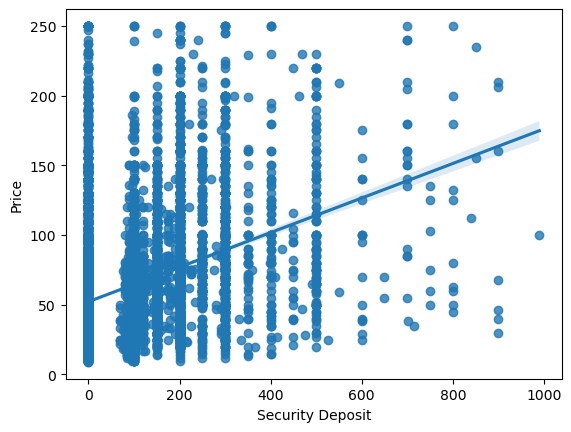

In [33]:
sns.regplot(data=df_madrid, x="Security Deposit", y="Price")
plt.xlabel("Security Deposit")
plt.ylabel("Price")
plt.show()

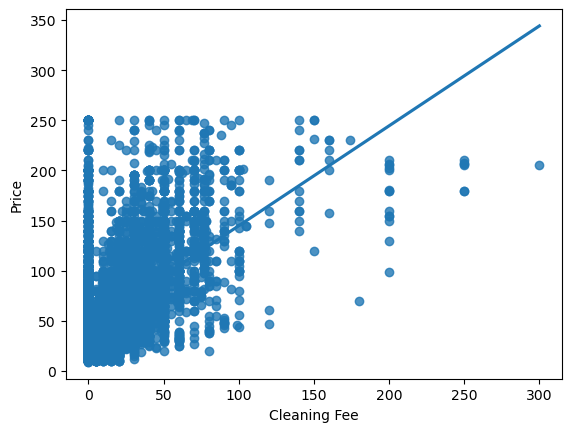

In [34]:
sns.regplot(data=df_madrid, x="Cleaning Fee", y="Price", ci=None)
plt.xlabel("Cleaning Fee")
plt.ylabel("Price")
plt.show()

#### *Vemos que en el caso de "Security Deposit", no parece  haber una tendencia lineal clara más allá de una cierta concentración en los precios menores independientemente del precio de alquiler, y por lo demás los precios parecen bastante distribuidos aleatoriamente. Pero en el caso de "Cleaning Fee", parece haber linealidad clara.
#### · Convertiré "Security Deposit" en categórica de sí o no presente: "Security Deposit Mandatory", y mantendré la original para comparar ambas.
#### · Mantendré "Cleaning Fee" como numérica, pero cambiando los Na por 0, asumiendo que si no hay, es que el propietario no ha establecido dichas tasas. Es interesante mantener la variable para el modelado a pesar de faltar tantos datos ya que parece clara una tendencia. Este cambio de NaNs será una directiva estructural de limpieza para los datos de entrada, resultando el cambio inocuo para el split de test, y permitiéndonos conservar muchos registros con gran cantidad de información.*

*-Empezamos por codificar "Security Deposit", la Fianza.*

In [35]:
len(df_madrid[df_madrid["Security Deposit"] !=0])

5571

In [36]:
def calcu(x):
    if x !=0:
        return 1
    else:
        return 0
df_madrid["Security Deposit Mandatory"] = df_madrid["Security Deposit"].apply(calcu)

In [37]:
len(df_madrid[df_madrid["Security Deposit Mandatory"] !=0])

5571

In [38]:
df_madrid["Security Deposit Mandatory"].unique()

array([0, 1])

In [39]:
df_madrid["Security Deposit Mandatory"].describe()

count    13085.000000
mean         0.425755
std          0.494476
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Security Deposit Mandatory, dtype: float64

#### · Volvemos a revisar el dataset

In [40]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13085 entries, 0 to 13084
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13085 non-null  object 
 1   Neighbourhood Group Cleansed  13085 non-null  object 
 2   Property Type                 13085 non-null  object 
 3   Room Type                     13085 non-null  object 
 4   Accommodates                  13085 non-null  int64  
 5   Bathrooms                     13040 non-null  float64
 6   Bedrooms                      13062 non-null  float64
 7   Beds                          13039 non-null  float64
 8   Bed Type                      13085 non-null  object 
 9   Price                         13085 non-null  float64
 10  Security Deposit              13085 non-null  float64
 11  Cleaning Fee                  13085 non-null  float64
 12  Guests Included               13085 non-null  int64  
 13  E

In [41]:
df_madrid.describe(include="all")

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
count                   13085                        13085         13085   
unique                    126                           21            22   
top               Embajadores                       Centro     Apartment   
freq                     1840                         6692         10785   
mean                      NaN                          NaN           NaN   
std                       NaN                          NaN           NaN   
min                       NaN                          NaN           NaN   
25%                       NaN                          NaN           NaN   
50%                       NaN                          NaN           NaN   
75%                       NaN                          NaN           NaN   
max                       NaN                          NaN           NaN   

              Room Type  Accommodates     Bathrooms      Bedrooms  \
count             13085  13085.000000  13040.000000  13062.000000   
unique                3           NaN           NaN           NaN   
top     Entire home/apt           NaN           NaN           NaN   
freq               7775           NaN           NaN           NaN   
mean                NaN      3.133894      1.233972      1.268718   
std                 NaN      1.886358      0.562672      0.771139   
min                 NaN      1.000000      0.000000      0.000000   
25%                 NaN      2.000000      1.000000      1.000000   
50%                 NaN      2.000000      1.000000      1.000000   
75%                 NaN      4.000000      1.000000      1.000000   
max                 NaN     16.000000      8.000000     10.000000   

                Beds  Bed Type         Price  Security Deposit  Cleaning Fee  \
count   13039.000000     13085  13085.000000      13085.000000  13085.000000   
unique           NaN         5           NaN               NaN           NaN   
top              NaN  Real Bed           NaN               NaN           NaN   
freq             NaN     12790           NaN               NaN           NaN   
mean        1.944091       NaN     61.770042         77.070997     16.659763   
std         1.417633       NaN     40.784527        113.009886     21.262702   
min         1.000000       NaN      9.000000          0.000000      0.000000   
25%         1.000000       NaN     30.000000          0.000000      0.000000   
50%         1.000000       NaN     50.000000          0.000000     10.000000   
75%         2.000000       NaN     80.000000        150.000000     30.000000   
max        16.000000       NaN    250.000000        990.000000    300.000000   

        Guests Included  Extra People  Availability 90  Review Scores Rating  \
count      13085.000000  13085.000000     13085.000000          10315.000000   
unique              NaN           NaN              NaN                   NaN   
top                 NaN           NaN              NaN                   NaN   
freq                NaN           NaN              NaN                   NaN   
mean           1.559113      7.345892        39.966679             91.612312   
std            1.031287     10.047695        29.241234              8.983506   
min            1.000000      0.000000         0.000000             20.000000   
25%            1.000000      0.000000        13.000000             88.000000   
50%            1.000000      0.000000        38.000000             94.000000   
75%            2.000000     14.000000        65.000000             98.000000   
max           16.000000    276.000000        90.000000            100.000000   

        Cancellation Policy  Amenities Count  Security Deposit Mandatory  
count          13085.000000     13085.000000                13085.000000  
unique                  NaN              NaN                         NaN  
top                     NaN              NaN                         NaN  
freq                    NaN              Na

#### *Descubrimos por el describe() que el Review Scores Rating no parece una variable que nos vaya a dar información, ya que la media de la valoración es de casi 92 sobre 100, con una desviación estándar de menos de 9 puntos. La variable es casi plana a lo largo de los datos, no tiene casi varianza, y sólo añadirá ruido al modelo. Voy a graficarla contra el precio para ver si podrían guardar relación.*

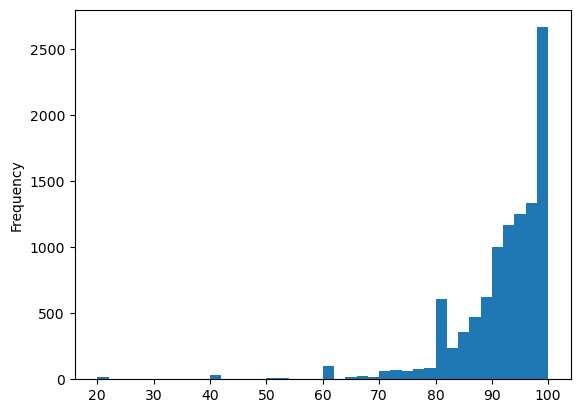

In [42]:
df_madrid["Review Scores Rating"].plot.hist(bins=40)
plt.show()

In [43]:
df_madrid["Review Scores Rating"].describe()

count    10315.000000
mean        91.612312
std          8.983506
min         20.000000
25%         88.000000
50%         94.000000
75%         98.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

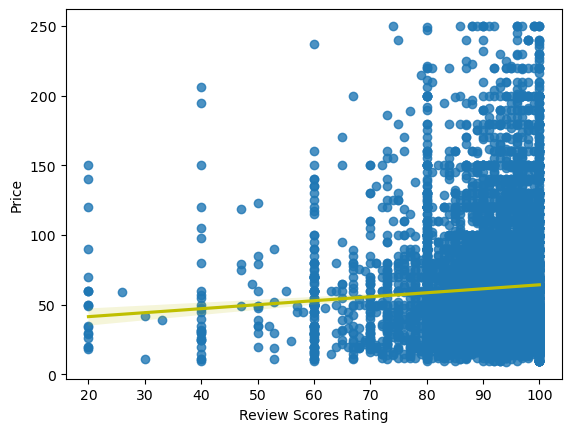

In [44]:
sns.regplot(data=df_madrid, x="Review Scores Rating", y="Price", line_kws=dict(color="y"))
plt.xlabel("Review Scores Rating")
plt.ylabel("Price")
plt.show()

*Parece evidente que esta variable no vale para predecir el precio.*

Veamos ahora qué porcentaje de NaNs hay para ver si los podemos eliminar.

In [45]:
percent = round((df_madrid["Review Scores Rating"].isna().sum()/len(df_madrid) *100),2)
print(f"El porcentaje de NaNs presente en la variable 'Review Scores Rating' es del {percent}%")

El porcentaje de NaNs presente en la variable 'Review Scores Rating' es del 21.17%


No podemos eliminar el 21.5% de los datos.  
Imputar el 21.5% de los datos con la media o la moda desvirtualizaría el dataset:

In [46]:
moda = sp.mode(df_madrid["Review Scores Rating"], nan_policy="omit")[0]
moda

100.0

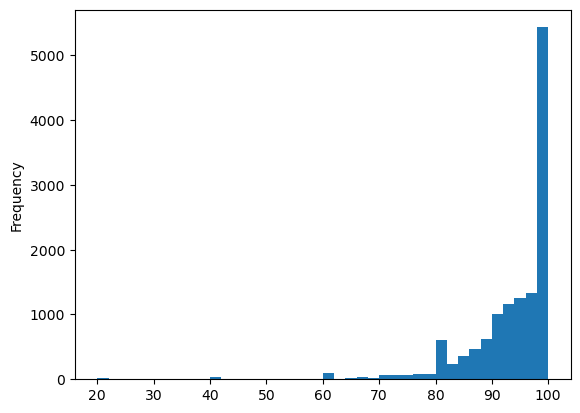

count    13085.000000
mean        93.387925
std          8.680964
min         20.000000
25%         90.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

In [47]:
rating_imputado = df_madrid["Review Scores Rating"].fillna(moda)
rating_imputado.plot.hist(bins=40)
plt.show()
rating_imputado.describe()

<Axes: xlabel='Review Scores Rating', ylabel='Price'>

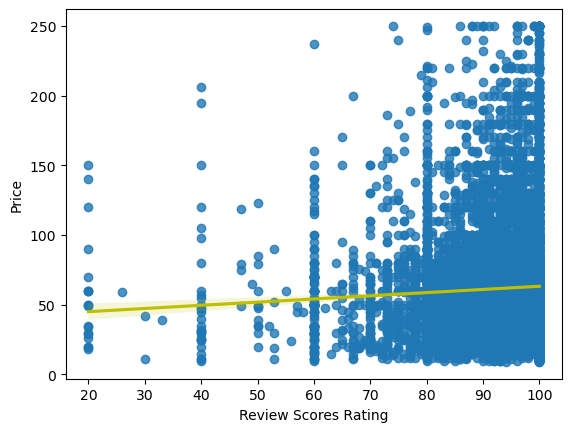

In [48]:
sns.regplot(data=df_madrid, x=rating_imputado, y="Price", line_kws=dict(color="y"))

#### Ya que a priori no parece ser buena predictora y que tiene un elevado porcentaje de NaNs y dado que imputar la variable no cambia el hecho de su poca varianza, eliminaré la variable.

In [49]:
df_madrid = df_madrid.drop("Review Scores Rating", axis=1)

#### · Ahora quiero revisar la variable Availability, quiero saber si parece tener algo que predecir:

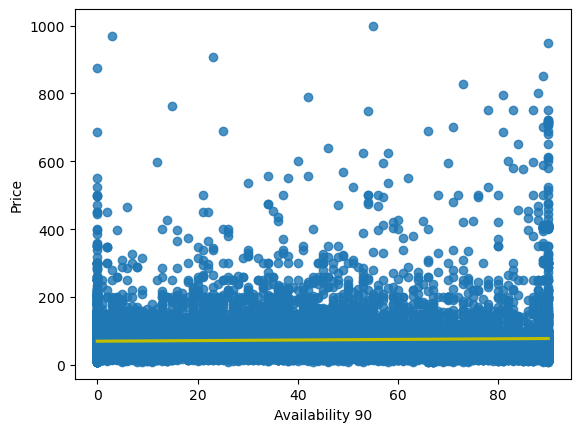

In [50]:
sns.regplot(data=df, y="Price", x="Availability 90", ci=None, line_kws=dict(color="y"))
plt.xlabel("Availability 90")
plt.ylabel("Price")
plt.show()

#### *A simple vista ya por la dispersión homogénea de los datos se puede ver que no vale para predecir el target. La línea de regresión lo confirma: Tiene una pendiente casi 0.*
#### Por lo tanto, eliminaré esta columna también del dataset. No merece la pena esperar al split de datos y que me lo diga una lasso.

In [51]:
df_madrid = df_madrid.drop("Availability 90", axis=1)

In [52]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13085 entries, 0 to 13084
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13085 non-null  object 
 1   Neighbourhood Group Cleansed  13085 non-null  object 
 2   Property Type                 13085 non-null  object 
 3   Room Type                     13085 non-null  object 
 4   Accommodates                  13085 non-null  int64  
 5   Bathrooms                     13040 non-null  float64
 6   Bedrooms                      13062 non-null  float64
 7   Beds                          13039 non-null  float64
 8   Bed Type                      13085 non-null  object 
 9   Price                         13085 non-null  float64
 10  Security Deposit              13085 non-null  float64
 11  Cleaning Fee                  13085 non-null  float64
 12  Guests Included               13085 non-null  int64  
 13  E

#### · Ahora eliminaré del dataset los registros que tengan Nan, que en el peor de los casos no llegará a 190.

In [53]:
# Guardo la extensión del dataset para cálculos posteriores:
len_madrid1 = len(df_madrid)
df_madrid = df_madrid.dropna(how='any')
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13005 entries, 0 to 13084
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13005 non-null  object 
 1   Neighbourhood Group Cleansed  13005 non-null  object 
 2   Property Type                 13005 non-null  object 
 3   Room Type                     13005 non-null  object 
 4   Accommodates                  13005 non-null  int64  
 5   Bathrooms                     13005 non-null  float64
 6   Bedrooms                      13005 non-null  float64
 7   Beds                          13005 non-null  float64
 8   Bed Type                      13005 non-null  object 
 9   Price                         13005 non-null  float64
 10  Security Deposit              13005 non-null  float64
 11  Cleaning Fee                  13005 non-null  float64
 12  Guests Included               13005 non-null  int64  
 13  Extra 

In [54]:
len_madrid2 = len(df_madrid)
perc_no_na = round(len_madrid2/len_madrid0*100,2)
print(f"Hemos conservado el {perc_no_na} de los datos que teníamos hasta ahora.")

Hemos conservado el 98.05 de los datos que teníamos hasta ahora.


In [55]:
print(f"El pipeline de preprocesado desde la carga de los datos hasta el final ha conservado el {round(len_madrid2/len_original*100,2)}")

El pipeline de preprocesado desde la carga de los datos hasta el final ha conservado el 87.99


#### *El resultado es bueno, teniendo en cuenta que había 1517 filas que no eran de Madrid y no deberían estar en la carga.*

## Pipeline completo final de ingesta y preprocesado:

In [56]:
"""
# Librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del daaset:
url = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"
df = pd.read_csv(url, sep=";")
len_original = len(df)

# Filtrado de ciudad
df_madrid = df[df.City.str.contains("Mad") | df.City.str.contains("mad") | df.City.str.contains("MAD") | df.City.str.contains("Aravaca") | df.City.str.contains("villa verde bajo") | df.City.str.contains("Chueca") | df.City.str.contains("Ventas") | df.City.str.contains("Boadilla") | df.City.str.contains("Elipa") | df.City.str.contains("Pozuelo") | df.City.str.contains("de Henares") | df.City.str.contains("Delicias")]
len_madrid0 = len(df_madrid)

# Selección primera de columnas
df_madrid = df_madrid.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 'Experiences Offered', 'Neighborhood Overview','Notes', 'Transit', 'Access', 'Interaction', 'House Rules','Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url','Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location','Host About', 'Host Response Time', 'Host Response Rate','Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url','Host Neighbourhood', 'Host Listings Count','Host Total Listings Count', 'Host Verifications', 'Street', 'Market','Smart Location', 'Country Code', 'Country', 'City', 'Zipcode', 'Square Feet', 'Neighbourhood', 'State','Latitude', 'Longitude', 'Weekly Price','Monthly Price', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated','Has Availability', 'Availability 30', 'Availability 60', 'Availability 365', 'Calendar last Scraped','Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 'Review Scores Location','Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count','Reviews per Month', 'Geolocation', 'Features', 'Availability 90'], axis=1)

# Procesado de Amenities:
df_madrid.reset_index(drop=True, inplace=True)
for idx, row in df_madrid.Amenities.items():
    counter=0
    if not pd.isna(row):
        for word in row.split(sep=","):
            if "translation missing" not in word:
                counter += 1
    df_madrid.loc[idx,"Amenities Count"] = int(counter)

df_madrid["Amenities Count"] = df_madrid["Amenities Count"].astype(int)
df_madrid = df_madrid.drop("Amenities", axis=1)

# Label Encoding de "Cancellation Policy"
from sklearn.preprocessing import LabelEncoder
le_canc = LabelEncoder()
df_madrid["Cancellation Policy"] = le_canc.fit_transform(df_madrid["Cancellation Policy"])
listado_canc = [(idx,clase) for idx, clase in enumerate(le_canc.classes_)]
listado_canc

# Imputación de Cleaning Fee y Security Deposit:
df_madrid["Cleaning Fee"] = df_madrid["Cleaning Fee"].fillna(0)
df_madrid["Security Deposit"] = df_madrid["Security Deposit"].fillna(0)

# Creación de variable "Security Deposit Mandatory":
def calcu(x):
    if x !=0:
        return 1
    else:
        return 0
df_madrid["Security Deposit Mandatory"] = df_madrid["Security Deposit"].apply(calcu)

# Descarte de NaNs restantes en el dataset:
len_madrid1 = len(df_madrid)
df_madrid = df_madrid.dropna(how='any')

# Informe de resultados del preprocesado:
len_madrid2 = len(df_madrid)
perc_no_na = round(len_madrid2/len_madrid0*100,2)
print(f"Hemos conservado el {perc_no_na} de los datos que teníamos en el deataset sólo de Madrid.")
print(f"El pipeline de preprocesado desde la carga de los datos hasta el final ha conservado el {round(len_madrid2/len_original*100,2)}")

"""

'\n# Librerías:\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Carga del daaset:\nurl = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"\ndf = pd.read_csv(url, sep=";")\nlen_original = len(df)\n\n# Filtrado de ciudad\ndf_madrid = df[df.City.str.contains("Mad") | df.City.str.contains("mad") | df.City.str.contains("MAD") | df.City.str.contains("Aravaca") | df.City.str.contains("villa verde bajo") | df.City.str.contains("Chueca") | df.City.str.contains("Ventas") | df.City.str.contains("Boadilla") | df.City.str.contains("Elipa") | df.City.str.contains("Pozuelo") | df.City.str.contains("de Henares") | df.City.str.contains("Delicias")]\nlen_madrid0 = len(df_madrid)\n\n# Selección primera de columnas\ndf_madrid = df_madrid.drop([\'ID\', \'Listing Url\', \'Scrape ID\', \'Last Scraped\', \'Name\', \'Summary\',\'Space\',

In [57]:
"""
display(df_madrid.info())
display(df_madrid.describe())
df_madrid.head()
"""

'\ndisplay(df_madrid.info())\ndisplay(df_madrid.describe())\ndf_madrid.head()\n'

In [58]:
df_madrid.to_csv('./df_madrid.csv', sep=';', decimal='.', index=False)

_____

## Apartado 2: Split de los datos en Train y Test

In [59]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_madrid, test_size=0.2, shuffle=True, random_state=123)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10404, 17)
Dimensiones del dataset de test: (2601, 17)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        10404 non-null  object 
 1   Neighbourhood Group Cleansed  10404 non-null  object 
 2   Property Type                 10404 non-null  object 
 3   Room Type                     10404 non-null  object 
 4   Accommodates                  10404 non-null  int64  
 5   Bathrooms                     10404 non-null  float64
 6   Bedrooms                      10404 non-null  float64
 7   Beds                          10404 non-null  float64
 8   Bed Type                      10404 non-null  object 
 9   Price                         10404 non-null  float64
 10  Security Deposit              10404 non-null  float64
 11  Cleaning Fee                  10404 non-null  float64
 12  Guests Included               10404 non-null  int64  
 13  E

#### · Primero codifiquemos las variables categóricas restantes con un media encoder:

In [61]:
cats = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type', 'Room Type', 'Bed Type']

mean_dicc = {}
for cat in cats:
    mean = df.groupby(cat)['Price'].mean()
    df[cat] = df[cat].map(mean).round().astype(int)
    df_test[cat] = df_test[cat].map(mean).round().astype(int)
    mean_dicc[cat] = mean


#### · Sigamos por revisar las correlaciones entre las variables.

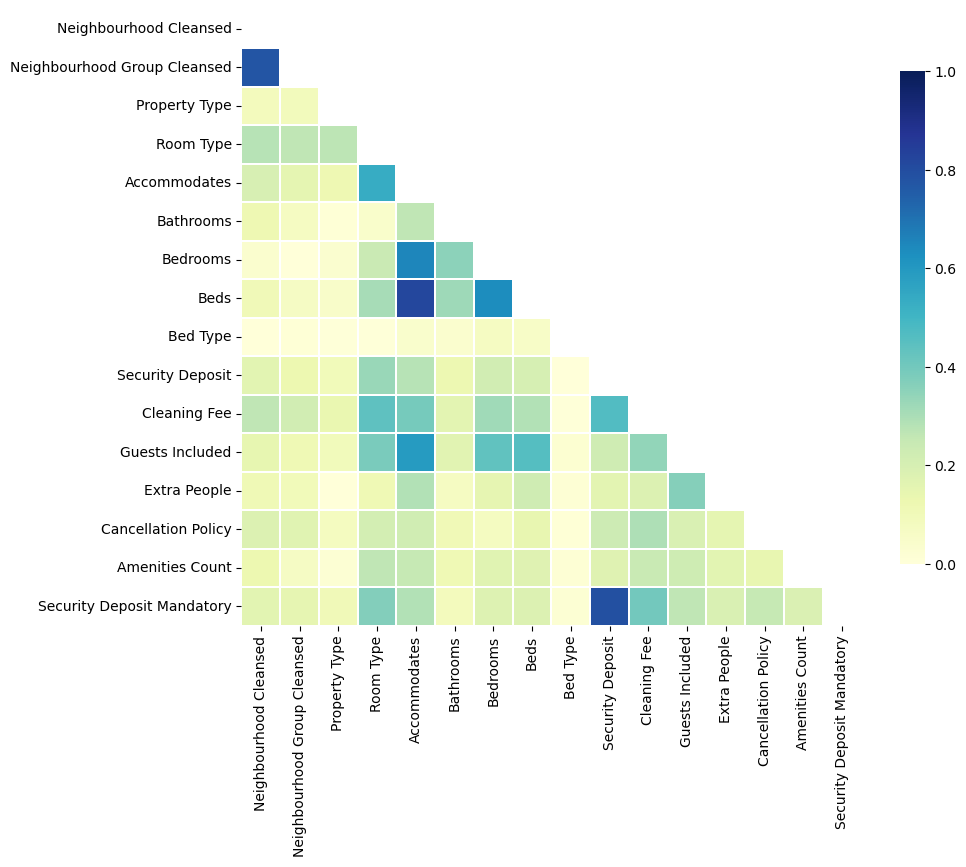

In [62]:
# Compute the correlation matrix
corr = np.abs(df.drop(["Price"], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [63]:
corr

Neighbourhood Cleansed  \
Neighbourhood Cleansed                      1.000000   
Neighbourhood Group Cleansed                0.774724   
Property Type                               0.087104   
Room Type                                   0.280114   
Accommodates                                0.197683   
Bathrooms                                   0.120443   
Bedrooms                                    0.038664   
Beds                                        0.103823   
Bed Type                                    0.002615   
Security Deposit                            0.162025   
Cleaning Fee                                0.263951   
Guests Included                             0.146714   
Extra People                                0.112438   
Cancellation Policy                         0.182530   
Amenities Count                             0.126734   
Security Deposit Mandatory                  0.162294   

                              Neighbourhood Group Cleansed  Property Type  \
Neighbourhood Cleansed                            0.774724       0.087104   
Neighbourhood Group Cleansed                      1.000000       0.093218   
Property Type                                     0.093218       1.000000   
Room Type                                         0.263991       0.267393   
Accommodates                                      0.155503       0.117573   
Bathrooms                                         0.071984       0.008647   
Bedrooms                                          0.001523       0.034136   
Beds                                              0.066461       0.050958   
Bed Type                                          0.009972       0.003981   
Security Deposit                                  0.127711       0.098502   
Cleaning Fee                                      0.217705       0.133337   
Guests Included                                   0.116506       0.096951   
Extra People                                      0.098350       0.000735   
Cancellation Policy                               0.168535       0.078356   
Amenities Count                                   0.067122       0.023013   
Security Deposit Mandatory                        0.149291       0.102879   

                              Room Type  Accommodates  Bathrooms  Bedrooms  \
Neighbourhood Cleansed         0.280114      0.197683   0.120443  0.038664   
Neighbourhood Group Cleansed   0.263991      0.155503   0.071984  0.001523   
Property Type                  0.267393      0.117573   0.008647  0.034136   
Room Type                      1.000000      0.532668   0.044203  0.240790   
Accommodates                   0.532668      1.000000   0.265308  0.648532   
Bathrooms                      0.044203      0.265308   1.000000  0.352160   
Bedrooms                       0.240790      0.648532   0.352160  1.000000   
Beds                           0.305001      0.817248   0.322277  0.636639   
Bed Type                       0.007375      0.039319   0.035609  0.070663   
Security Deposit               0.331013      0.278669   0.123651  0.217585   
Cleaning Fee                   0.440682      0.392376   0.159112  0.318556   
Guests Included                0.383545      0.593032   0.164358  0.435546   
Extra People                   0.114996      0.286333   0.074030  0.150310   
Cancellation Policy            0.211644      0.221568   0.107269  0.074414   
Amenities Count                0.264296      0.250850   0.114266  0.170744   
Security Deposit Mandatory     0.369931      0.288456   0.086589  0.179653   

                                  Beds  Bed Type  Security Deposit  \
Neighbourhood Cleansed        0.103823  0.002615          0.162025   
Neighbourhood Group Cleansed  0.066461  0.009972          0.127711   
Property Type                 0.050958  0.003981          0.098502   
Room Type                     0.305001  0.007375          0.331013   
Accommodates                  0.817248  0.039319          0.278669   
Bathrooms           

#### *La correlación sólo revela una fuerte relación entre "Accommodates" y "Beds", y entre "Beds" y "Bedrooms", entre los dos descriptores de Barrios y lógicamente entre las dos del Security Deposit. Las de los Neighbourhoods y las del Security Deposit las mantendré para lo análisis de importancia de las variables. Las otras tres las analizo a continuación.*   
#### Un poco de investigación en páginas especializadas en Internet me descubren un método para evaluar la posible multicolinealidad:  https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a

El método VIF (Variance Inflaction Factor) proporciona una ayuda efectiva para detectar una tolerancia a la comultilinealidad. Por regla general y dependiendo del negocio un factor de 5 o más indica un problema de colinealidad, y deberían eliminarse una a una empezando por la de un VIF más elevado y volver a probar con el resto en modo cíclico hasta que ninguna de ellas supere el factor de 5.
Realizaré un test VIF para detectar cual de las variables debería eliminar, si es que es el caso, para solucionar el problema de redundancia de variables.

Primero comprobamos los factores de inflacción de la varianza de las 3 juntas:

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = df[["Beds", "Bedrooms", "Accommodates"]]
X_const = add_constant(X_vif)
vif1 = pd.Series([vif(X_const.values, i) for i in range(X_vif.shape[1])], index = X_vif.columns)
vif1

Beds            4.388544
Bedrooms        3.200167
Accommodates    1.834285
dtype: float64

Ahora probaremos a eliminar la más alta, Beds:

In [65]:
X_vif2 = df[["Bedrooms", "Accommodates"]]
X_const2 = add_constant(X_vif2)
vif2 = pd.Series([vif(X_const2.values, i) for i in range(X_vif2.shape[1])], index = X_vif2.columns)
vif2

Bedrooms        4.354891
Accommodates    1.725905
dtype: float64

Indaguemos un poco en las 3 variables. Haré una comparación de la relación lineal entre los pares de variables y el análisis de sus residuos.

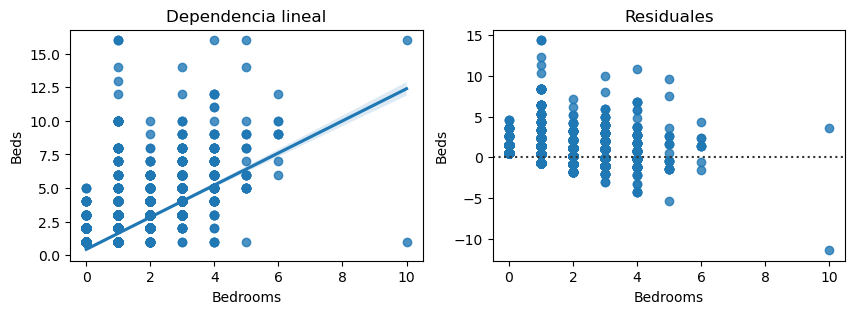

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.regplot(ax=ax1, data=df, x="Bedrooms", y="Beds")
sns.residplot(ax=ax2, data=df, x="Bedrooms", y="Beds")
ax1.set_title("Dependencia lineal")
ax2.set_title("Residuales")
plt.show()

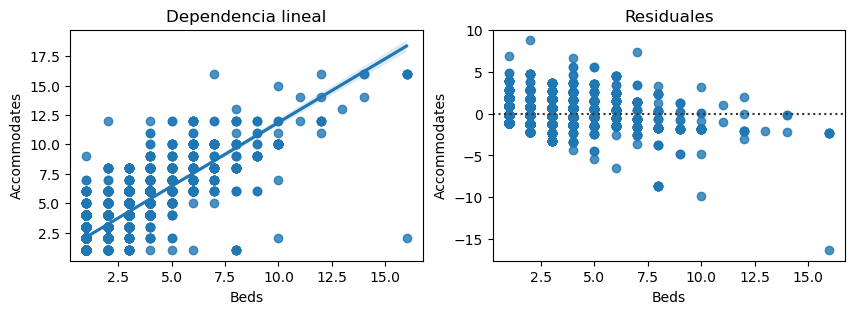

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.regplot(ax=ax1, data=df, x="Beds", y="Accommodates")
sns.residplot(ax=ax2, data=df, x="Beds", y="Accommodates")
ax1.set_title("Dependencia lineal")
ax2.set_title("Residuales")
plt.show()

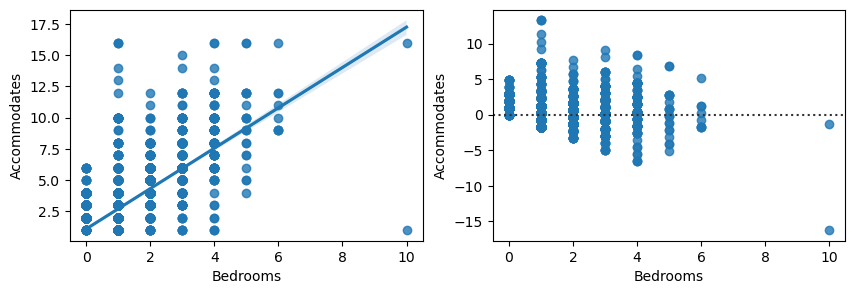

In [68]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.regplot(ax=axes[0], data=df, x="Bedrooms", y="Accommodates")
sns.residplot(ax=axes[1], data=df, x="Bedrooms", y="Accommodates")
ax1.set_title("Dependencia lineal")
ax2.set_title("Residuales")
plt.show()

Ya que la correlación entre Beds y Accommodates es la más alta (0.82), ya que su factor VIF es el más alto, y ya que en las gráficas se aprecian los valores más reunidos en torno a la regresión de la pareja Beds-Accommodates y sus residuales están un poco más equilibrados a ambos lados del error cero, eliminaré la variable Beds.

In [69]:
df = df.drop("Beds", axis=1)
df_test = df_test.drop("Beds", axis=1)

#### · Ahora revisaremos posibles outliers.

In [70]:
import warnings
warnings.filterwarnings('ignore')
"""
fig, ax = plt.subplots(figsize=(14,9))
sns.boxenplot(ax=ax,x="Bedrooms", y="Price", data=df)
sns.swarmplot(ax=ax,x="Bedrooms", y="Price", data=df, alpha=.3, size=1.5, color="black")
plt.yscale("log")"""

'\nfig, ax = plt.subplots(figsize=(14,9))\nsns.boxenplot(ax=ax,x="Bedrooms", y="Price", data=df)\nsns.swarmplot(ax=ax,x="Bedrooms", y="Price", data=df, alpha=.3, size=1.5, color="black")\nplt.yscale("log")'

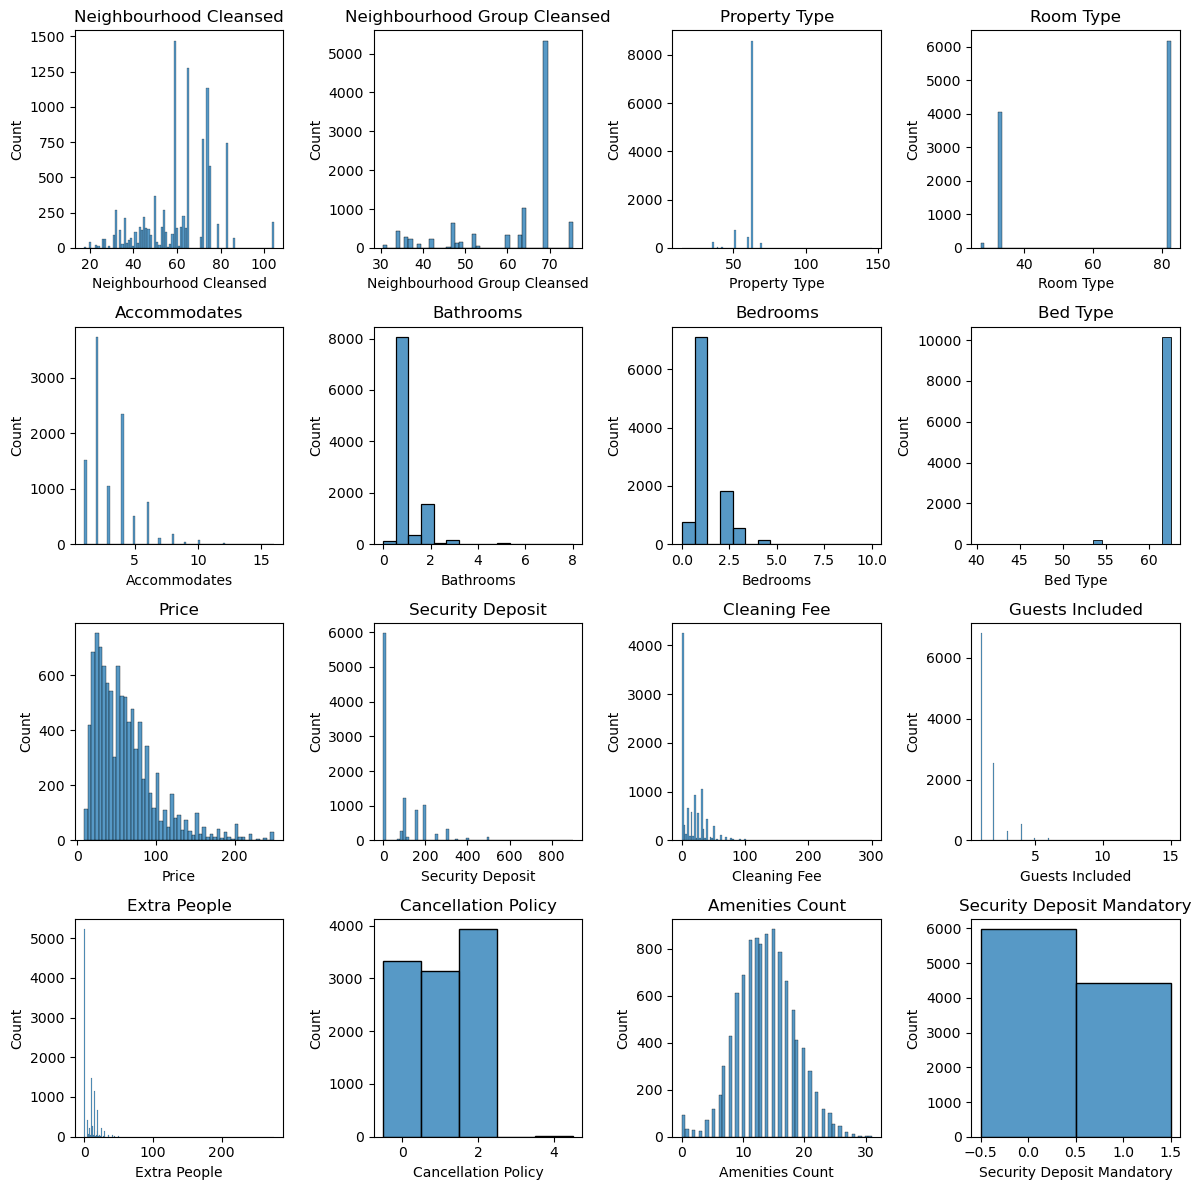

In [71]:
# Autoconfiguración de filas y columnas según el número de columnas del dataframe.
import math

num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 4)

# Creo los subplots con los cálculos anteriores.
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 3))

# Coloco los axes en fila para poderlos mover mejor.
axes = axes.flatten()

# Eliminamos las celdas que no tengan gráfica
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes[i])

# Loop para colocar secuencialmente las gráficas en sus subplots
for i, col in enumerate(df.columns):
    # Creao un histograma para cada columna en el subplot correspondiente
    # Si es categórica, que ajuste el parámetro de hisplot() discrete=True
    if col in ["Neighbourhood Cleansed", "Neighbourhood Group Cleansed", "Property Type", "Room Type", "Bed Type", "Cancellation Policy", "Security Deposit Mandatory"]:
        sns.histplot(df[col], ax=axes[i], discrete=True)
        axes[i].set_title(col)
    else:
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col) 

plt.tight_layout()
plt.show()

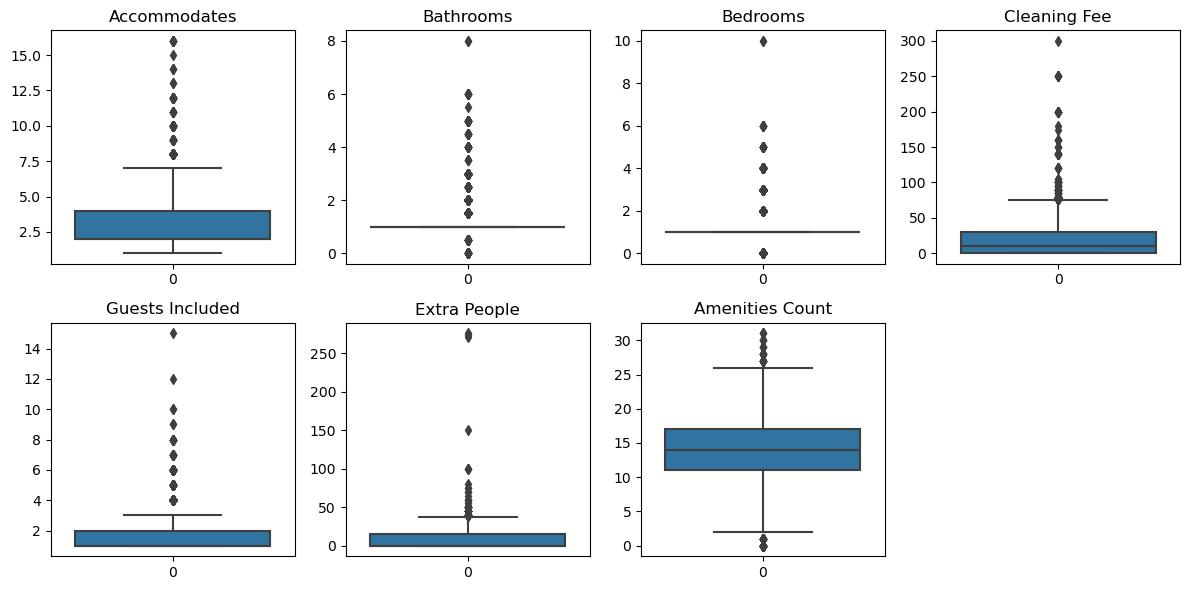

In [72]:
# Autoconfiguración de filas y columnas según el número de columnas del dataframe.
df_cualit = df[["Accommodates", "Bathrooms", "Bedrooms", "Cleaning Fee", "Guests Included", "Extra People", "Amenities Count"]]
num_cols = len(df_cualit.columns)
num_rows = math.ceil(num_cols / 4) # Para calcular las filas dividimos por 4 columnas de ancho en cada fila, y redondeamos al más alto.

# Creo los subplots con los cálculos anteriores.
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 3))

# Coloco los axes en fila para poderlos mover mejor.
axes = axes.flatten()

# Eliminamos las celdas que no tengan gráfica
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes[i])

# Loop para colocar secuencialmente las gráficas en sus subplots
for i, col in enumerate(df_cualit.columns):
    # Creo un boxplot para cada columna en el subplot correspondiente
    sns.boxplot(df_cualit[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### *Resultado del análisisde outliers:*

- Podemos ver por los histogramas que en las variables "Accommodates" y "Bathrooms", "Bedrooms" hay colas largas de valores muy bajos, pero es especialmente exagerado en las variables "Cleaning Fee", "Guests Included" y "Extra People". Vamos a analizar esos valores extremos empezando por las variables categóricas:

In [73]:
df_temp = pd.DataFrame(np.unique(df["Accommodates"], return_counts=True)).T
df_temp.columns=["Accommodates", "Count"]
df_temp.T

0     1     2     3    4    5    6    7   8   9   10  11  12  \
Accommodates     1     2     3     4    5    6    7    8   9  10  11  12  13   
Count         1527  3740  1045  2358  511  770  117  177  38  69   9  28   2   

              13  14  15  
Accommodates  14  15  16  
Count          3   1   9

En cuanto a los Accommodates, hay hasta 29 pisos a la vez que tengan más de 12, así que no parece probable que sean outliers. Se podría estudiar eliminar los que sean 12 o más si no es excesiva la pérdida de registros en total con las eliminaciones de los outliers de las demás variables

In [74]:
df_temp = pd.DataFrame(np.unique(df["Bathrooms"], return_counts=True)).T
df_temp.columns=["Bathrooms", "Count"]
df_temp.T

0     1       2      3       4     5      6    7     8     9   \
Bathrooms   0.0   0.5     1.0    1.5     2.0   2.5    3.0  3.5   4.0   4.5   
Count      57.0  49.0  8064.0  355.0  1577.0  67.0  154.0  4.0  19.0  12.0   

             10   11    12   13  
Bathrooms   5.0  5.5   6.0  8.0  
Count      32.0  1.0  11.0  2.0

En el caso de los baños, hasta 6 baños hay varias coincidencias, pero a partir de 13 sólo hay 4 casos. Se podría eliminar, aunque podrían ser verdaderos en caso de que las habitaciones sean de hoteles, casas de invitados, etc.... Probaré a usar todos los valores de momento.

In [75]:
df_temp = pd.DataFrame(np.unique(df["Bedrooms"], return_counts=True)).T
df_temp.columns=["Bedrooms", "Count"]
df_temp.T

0       1       2      3      4     5    6     7
Bedrooms    0.0     1.0     2.0    3.0    4.0   5.0  6.0  10.0
Count     752.0  7104.0  1838.0  544.0  132.0  23.0  9.0   2.0

En Bedrooms tenemos varias coincidencias en los valores más altos, mostrando que seguramente no son outliers. Pensaremos en su eliminación tras evaluar el modelo.

**Vamos con las variables numéricas con valores extremos:**
- Empezamos con "Cleaning Fee"

In [76]:
df["Cleaning Fee"].describe()

count    10404.000000
mean        16.646770
std         21.202178
min          0.000000
25%          0.000000
50%         10.000000
75%         30.000000
max        300.000000
Name: Cleaning Fee, dtype: float64

Se observa que hasta el 75% de los alquileres tienen una tasa igual o inferior a 30€. Veamos qué Tasa máxima tienen hasta el 99.5% de los datos:

In [77]:
np.percentile(df["Cleaning Fee"],99.5)

100.0

El 99.5% de los alquileres tienen una tasa hasta 126.5€. Son valores que a pesar de sera altos podrían estar relacionados con un tamaño grande de vivienda, o por el número de inquilinos totales, ya que se repiten varias veces, no parecen valores aislados, si no más bien una escala creciente progresivamente. Podríamos pensar en eliminar los superiores a ese valor, pero esperaremos al caso de eliminarlos hasta ver el desempeño del modelo.

In [78]:
df_temp = pd.DataFrame(np.unique(df["Cleaning Fee"]>150, return_counts=True)).T
df_temp.columns=["C. Fee", "Count"]
df_temp.T

0     1
C. Fee  False  True
Count   10383    21

In [79]:
df[df["Cleaning Fee"]>=150].sort_values(by="Cleaning Fee").tail(50)["Cleaning Fee"]

10308    150.0
745      150.0
8865     150.0
3229     160.0
6495     160.0
5302     160.0
4868     160.0
3856     174.0
795      180.0
10056    200.0
6471     200.0
4520     200.0
4403     200.0
4234     200.0
4188     200.0
1553     200.0
1502     200.0
10156    200.0
6130     250.0
4052     250.0
6964     250.0
8301     250.0
8920     250.0
563      300.0
Name: Cleaning Fee, dtype: float64

Como vemos por este filtrado y por el gráfico de boxplot, lo que parecerían valores outliers pueden ser valores válidos, ya que resultan ser valores secuenciales muy próximos entre sí y que se repiten, pero a partir de 300 los voy a eliminar al estar muy alejados de los demás y tener sólo una coincidencia de cada.

In [80]:
# Filtramos ambas particiones por el máximo
df = df[df["Cleaning Fee"] <= 300]
df_test = df_test[df_test["Cleaning Fee"] <= 300]

- Continuemos con "Guests Included"

In [81]:
np.percentile(df["Guests Included"],99.5)

6.0

El 99.5% de los datos tienen como máximo 6 personas. Veamos cómo son los valores extremos:

In [82]:
df[df["Guests Included"] > 8].sort_values(by="Guests Included")["Guests Included"]

3830     9
8594     9
642     10
6013    10
6394    12
1032    15
Name: Guests Included, dtype: int64

De nuevo vemos que los valores están agrupados, se repiten y son bastante consecutivos. No parece que sean outliers, pero podríamos eliminar los que están por encima de 10 para intentar mejorar el modelo. De momento no elimino nada.

- Acabemos con "Extra People"

In [83]:
df["Extra People"].describe()

count    10404.000000
mean         7.384852
std         10.329164
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max        276.000000
Name: Extra People, dtype: float64

In [84]:
np.percentile(df["Extra People"],95)

25.0

Veamos los valores mayores de 15:

In [85]:
df[df["Extra People"] > 25].sort_values(by="Extra People")["Extra People"].tail(30)

6355      50
2142      50
3723      50
2002      50
6282      50
6044      50
1759      50
5353      50
5888      50
1270      50
5005      50
3657      50
7611      55
6825      60
1214      60
1812      60
1527      60
10161     65
3720      70
991       70
8577      75
1333      75
2228      80
7362     100
4376     100
2005     100
6765     150
8000     271
2397     274
7134     276
Name: Extra People, dtype: int64

En este caso se aprecian saltos muy grandes poco consecutivos al final de los datos ordenados. Vamos a eliminar los 3 últimos valores, desde 150, ya que sólo hay un caso de cada.

In [86]:
# Filtramos ambas particiones por el máximo
df = df[df["Extra People"] < 150]
df_test = df_test[df_test["Extra People"] < 150]

In [87]:
df.describe()

Neighbourhood Cleansed  Neighbourhood Group Cleansed  Property Type  \
count            10400.000000                  10400.000000   10400.000000   
mean                61.646731                     61.560096      61.317692   
std                 15.591354                     12.033132       5.923157   
min                 18.000000                     31.000000      15.000000   
25%                 53.000000                     52.000000      63.000000   
50%                 63.000000                     69.000000      63.000000   
75%                 74.000000                     69.000000      63.000000   
max                104.000000                     75.000000     145.000000   

          Room Type  Accommodates     Bathrooms      Bedrooms      Bed Type  \
count  10400.000000  10400.000000  10400.000000  10400.000000  10400.000000   
mean      62.068173      3.141154      1.229952      1.262019     61.766538   
std       24.158181      1.888486      0.554711      0.759274      1.656163   
min       28.000000      1.000000      0.000000      0.000000     41.000000   
25%       33.000000      2.000000      1.000000      1.000000     62.000000   
50%       82.000000      2.000000      1.000000      1.000000     62.000000   
75%       82.000000      4.000000      1.000000      1.000000     62.000000   
max       82.000000     16.000000      8.000000     10.000000     62.000000   

              Price  Security Deposit  Cleaning Fee  Guests Included  \
count  10400.000000      10400.000000  10400.000000     10400.000000   
mean      61.675865         77.217115     16.643558         1.558462   
std       40.617846        113.405624     21.204375         1.018270   
min        9.000000          0.000000      0.000000         1.000000   
25%       30.000000          0.000000      0.000000         1.000000   
50%       50.000000          0.000000     10.000000         1.000000   
75%       80.000000        150.000000     30.000000         2.000000   
max      250.000000        900.000000    300.000000        15.000000   

       Extra People  Cancellation Policy  Amenities Count  \
count  10400.000000         10400.000000     10400.000000   
mean       7.294327             1.059135        13.730288   
std        9.182144             0.836277         4.744480   
min        0.000000             0.000000         0.000000   
25%        0.000000             0.000000        11.000000   
50%        0.000000             1.000000        14.000000   
75%       15.000000             2.000000        17.000000   
max      100.000000             4.000000        31.000000   

       Security Deposit Mandatory  
count                10400.000000  
mean                     0.426154  
std                      0.494540  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                      1.000000

#### · Empecemos la selección de características basadas en modelos:

-- Primero normalizamos los datos y creamos los conjuntos de features y target, y le aplicamos el mismo tratamiento a los datos de test:

In [88]:
from sklearn import preprocessing

X = df.drop("Price", axis=1)
feature_names = X.columns
X_train = X.values
y_train = df["Price"].values

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [89]:

X_test = df_test.drop("Price", axis=1)
X_test = X_test.values
y_test = df_test["Price"].values

    
XtestScaled = scaler.transform(X_test)

1.- Primero haremos un test doble de F-test y Mutual Information

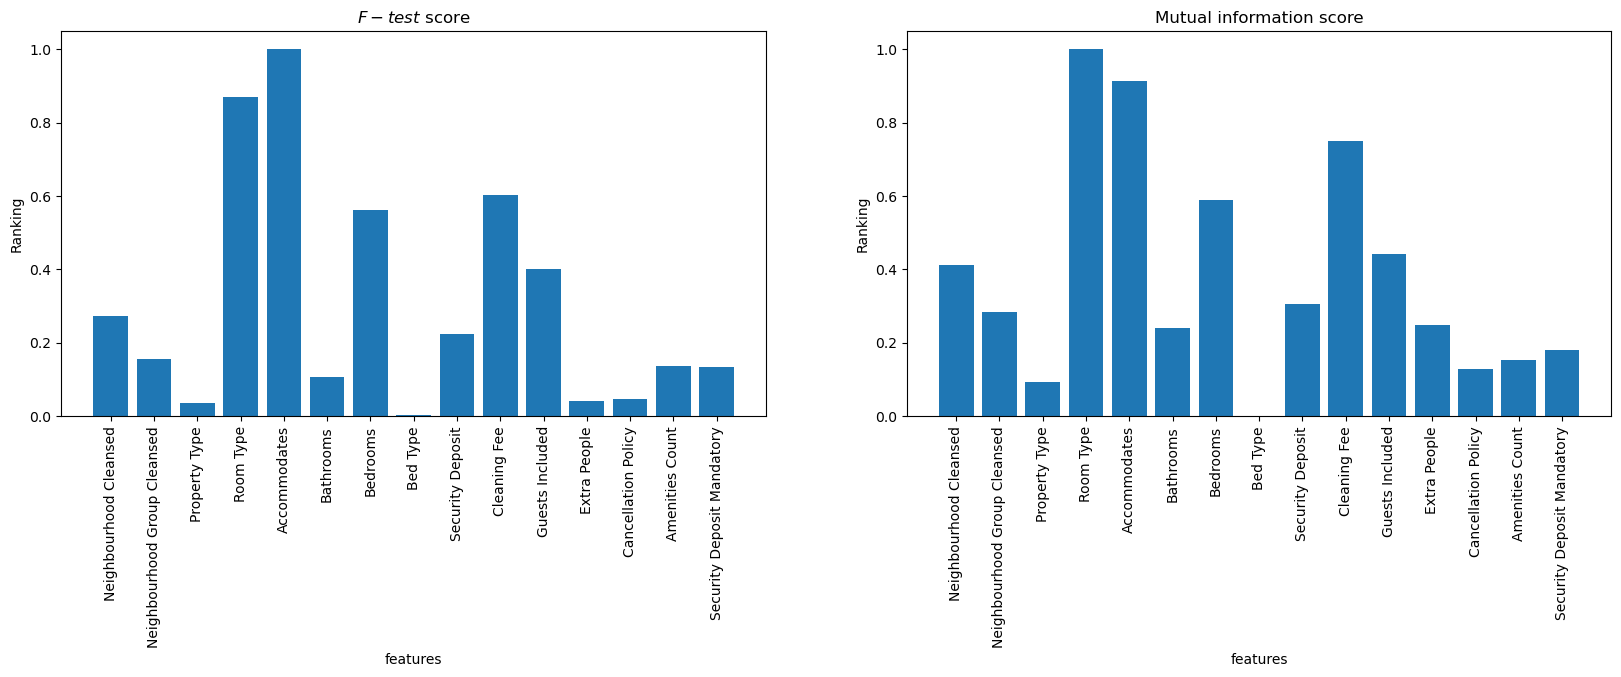

In [90]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')


plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Decisión basada en estos tests:  
En ambos tests, "Property Type" y "Bed Type" tienen un ranking casi nulo. Las eliminaría en un modelo de selección manual de características. "Cancellation Policy" también tiene un valor muy bajo en ambos tests, así que la eliminaría. Además, de las dos de los barrios la más importante es "Neighbourhood Cleansed", así que es la que conservaría para eliminar su correlación elevada. Po último, "Security Deposit" tiene mayor importancia que la binaria que creé yo, así que eliminaría "Security Deposit Mandatory".

-- Otra manera de evaluar la importancia de las features es con un wrapper. Usaré un RandomForestRegressor, que guarda las importancias en el atributo "feature_importances_"  
Si dejamos min_samples_leaf=1 conseguimos que se reflejen todas las características sin eliminar ninguna

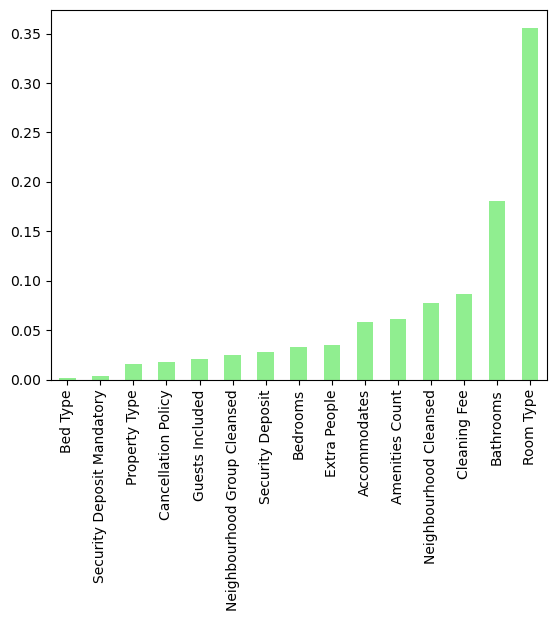

In [91]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=100, min_samples_leaf=1, random_state=123)

rf.fit(X_train, y_train)

importancias = pd.Series(rf.feature_importances_, index=feature_names).sort_values()
importancias.plot(kind="bar", color="lightgreen")
plt.show()

Si queremos penalizar más las características, entonces basta con hacer mucho más pequeño el parámetro libre min_samples_leaf:

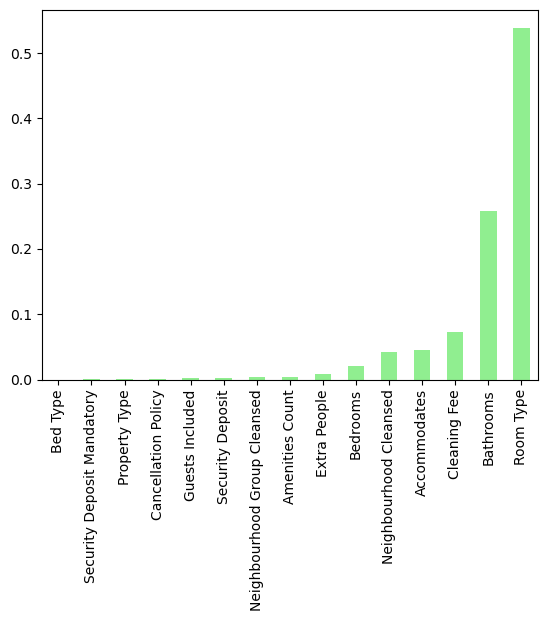

In [92]:

rf = RFR(n_estimators=100, min_samples_leaf=0.01, random_state=123)

rf.fit(X_train, y_train)

importancias = pd.Series(rf.feature_importances_, index=feature_names).sort_values()
importancias.plot(kind="bar", color="lightgreen")
plt.show()

Esto viene a confirmar el anterior método de filtrado. Quizás podríamos quitar "Guests Included", pero lo probaría en caso de que el modelo tenga overfitting.

-----

## Apartado 3: Modelado

### -- Modelo de Regresión Polinómica

Comencemos entonces con un modelo de regresión polinómica después de eliminar a mano estas variables fruto del análisis anterior de Importancia de Características: "Property Type", "Bed Type", "Cancellation Policy", "Neighbourhood Group Cleansed", "Security Deposit Mandatory"

In [93]:
# Filtrado:
df_filtered = df.drop(["Property Type", "Bed Type", "Cancellation Policy", "Neighbourhood Group Cleansed", "Security Deposit Mandatory"], axis=1)
df_test_filtered = df_test.drop(["Property Type", "Bed Type", "Cancellation Policy", "Neighbourhood Group Cleansed", "Security Deposit Mandatory"], axis=1)

# Separación del target en train y test y escalado según train.
from sklearn import preprocessing
# Para Train:
Xf = df_filtered.drop("Price", axis=1)
feature_names_f = Xf.columns
Xf_train = Xf.values
yf_train = df_filtered["Price"].values

scalerf = preprocessing.StandardScaler().fit(Xf_train)
XftrainScaled = scalerf.transform(Xf_train)

# Para Test:
Xf_test = df_test_filtered.drop("Price", axis=1)
Xf_test = Xf_test.values
yf_test = df_test_filtered["Price"].values
   
XftestScaled = scalerf.transform(Xf_test)



Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatur

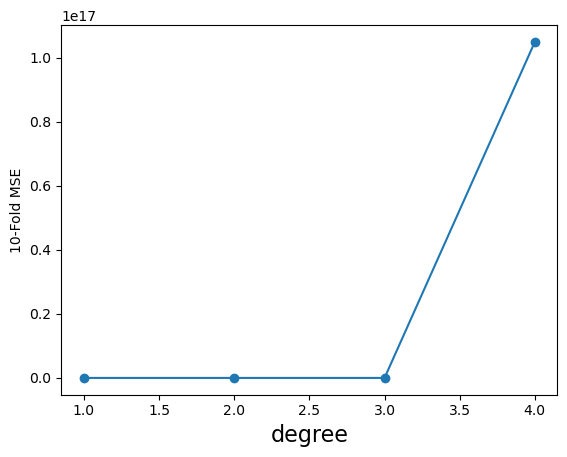

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as MSE

# Usaré un modelo de pipeline de sklearn para que el GridSearch pueda manipular varios modelos de procesado y modelado de manera simultánea.
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())
# Grados polinómicos a probar (He llegado hasta 6 pero no aumenta la eficiencia y el tiempo de cálculo se multiplica por 10 con cada grado)
degrees = [1,2,3,4]
# Rejilla de grados
param_grid = {'polynomialfeatures__degree': degrees}
# GridSearch
grid2 = GridSearchCV(pipe, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2)
grid2.fit(XftrainScaled, yf_train)

print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

#-1 porque es negado
scores = -1*np.array(grid2.cv_results_['mean_test_score'])
plt.plot(degrees,scores,'-o')
plt.xlabel('degree',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()



In [95]:
# Ahora personalizamos el modelo con el grado óptimo
degree_optimo = grid2.best_params_['polynomialfeatures__degree']
poly = PolynomialFeatures(degree_optimo) 
Xf_train_poly = poly.fit_transform(XftrainScaled)
Xf_test_poly = poly.fit_transform(XftestScaled)

# Entrenamos un modelo
lr = LinearRegression().fit(Xf_train_poly, yf_train)

# Hacemos predicción sobre ambas particiones y comparamos el RMSE
ytrainRegr = lr.predict(Xf_train_poly)
ytestRegr  = lr.predict(Xf_test_poly)
mseTrainModelRegressor = MSE(yf_train,ytrainRegr)
mseTestModelRegressor = MSE(yf_test,ytestRegr)

print('MSE Modelo Polinómico (train): %0.3g' % mseTrainModelRegressor)
print('MSE Modelo Polinómico (test) : %0.3g' % mseTestModelRegressor)

print('RMSE Modelo Polinómico (train): %0.3g' % np.sqrt(mseTrainModelRegressor))
print('RMSE Modelo Polinómico (test) : %0.3g' % np.sqrt(mseTestModelRegressor))

print("Score de Train: ", lr.score(Xf_train_poly, yf_train) )
print("Score de Test: ", lr.score(Xf_test_poly, yf_test) )

MSE Modelo Polinómico (train): 516
MSE Modelo Polinómico (test) : 579
RMSE Modelo Polinómico (train): 22.7
RMSE Modelo Polinómico (test) : 24.1
Score de Train:  0.6869548486156659
Score de Test:  0.6648310144237015


Dibujamos la predicción encima de los datos reales para comparar resultados:

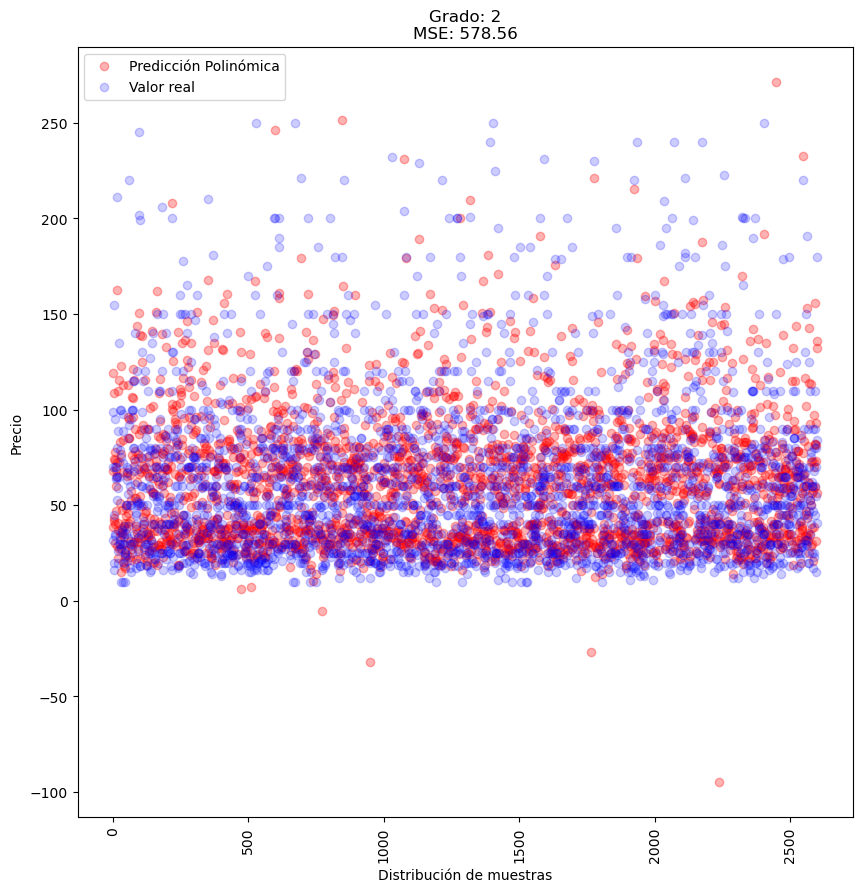

In [96]:
plt.figure(figsize = (10, 10))
plt.plot(ytestRegr, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Polinómica')
plt.plot(yf_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'Grado: {degree_optimo}\nMSE: {mseTestModelRegressor:.2f}')
plt.legend()
plt.show()

Los datos predichos se ajustan muy bien al dataset real, menos en los valores altos.

<Axes: >

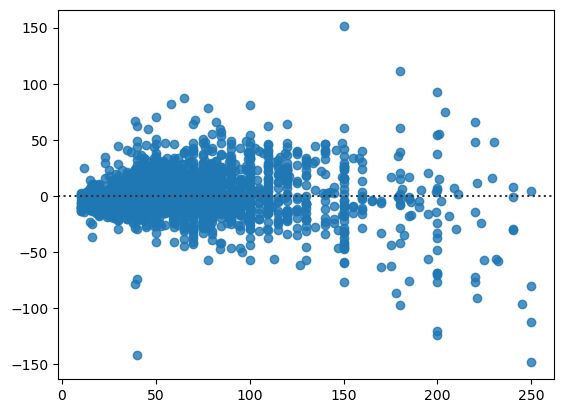

In [97]:
sns.residplot(x=yf_test,y=ytestRegr)

#### Conclusiones modelo Polinómico:

Se observa que el modelo polinómico de grado 2 ajusta muy bien con las features reducidas a mano, con errores muy parecidos en train y test y una distribución de residuales muy centrada en torno al cero y bastante simétrica. Sin embargo, no funciona bien para predecir precios de más de 200€, por lo que tendría que especificarse como indicación de uso en producción.

### -- Modelo con feature selection de Regresión Lasso

Ahora crearé un modelo de Regresión Lasso dejando que decida él las variables a eliminar.

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.11513953993264472; total time=   0.0s
[CV] END ..........................alpha=0.115

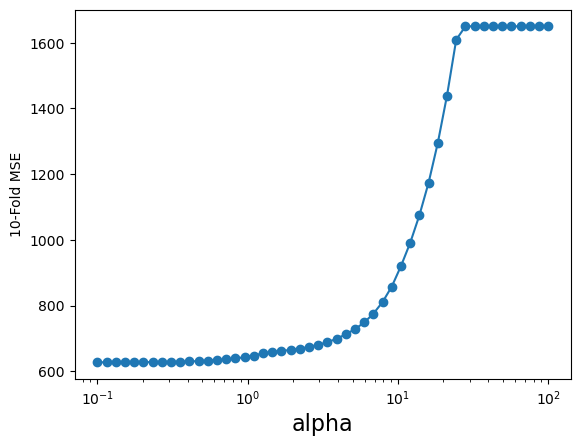

In [98]:
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,2,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

Se observa cómo el error empieza a aumentar en cuanto vamos quitando características. Eso nos dice que podemos quitar pocas variables antes de que el error se vuelva demasiado grande.

In [99]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = MSE(y_train,ytrainLasso)
mseTestModelLasso = MSE(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print("Score de Train: ", lasso.score(XtrainScaled,y_train) )
print("Score de Test: ", lasso.score(XtestScaled,y_test) )

MSE Modelo Lasso (train): 625
MSE Modelo Lasso (test) : 701
RMSE Modelo Lasso (train): 25
RMSE Modelo Lasso (test) : 26.5
Score de Train:  0.6211878601870737
Score de Test:  0.5939797251253167


Con un alpha de 0.1 para la Regresión lineal Lasso, obtenemos unas predicciones sobre el set de test muy buenas, con un error casi idéntico al de Train.

Podemos observar aquí qué coeficientes le ha asignado a las variables. Cabe reseñar que sólo ha eliminado 2 variables, y una tercera es casi 0.

In [100]:
w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

Neighbourhood Cleansed 7.963447601958781
Neighbourhood Group Cleansed 0.0
Property Type -0.01993919159648411
Room Type 12.564873512394746
Accommodates 7.299320227596453
Bathrooms 3.2579760311796817
Bedrooms 8.117705362672211
Bed Type 0.4638435464301671
Security Deposit 5.807487914796988
Cleaning Fee 6.929756540084826
Guests Included 2.4007614589783524
Extra People -2.2274504822205423
Cancellation Policy -1.9765173294049894
Amenities Count 1.9686093986952329
Security Deposit Mandatory -5.731525782348432


Dibujamos la superposición de los valores reales del dataset de test y del predicho por el modelo.

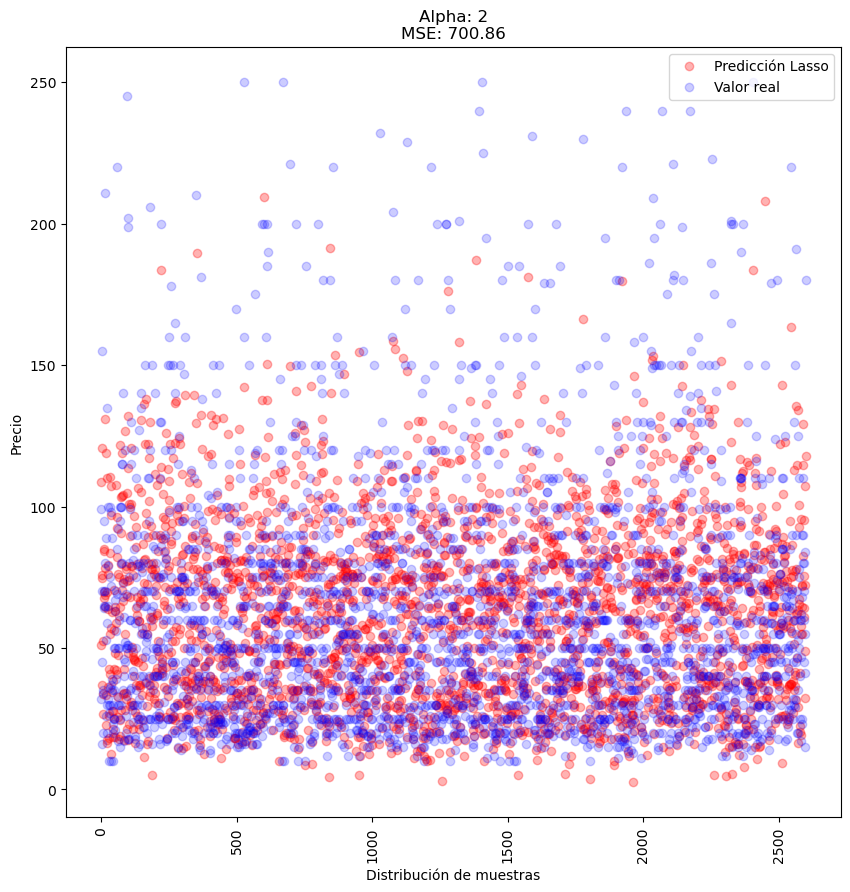

In [101]:
plt.figure(figsize = (10, 10))
plt.plot(ytestLasso, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Lasso')
plt.plot(y_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'Alpha: {degree_optimo}\nMSE: {mseTestModelLasso:.2f}')
plt.legend()
plt.show()

Se acercan mucho las predicciones a los valores reales, menos en los valores altos, algo lógico al no poder aprender de numerosos valores altos.

<Axes: >

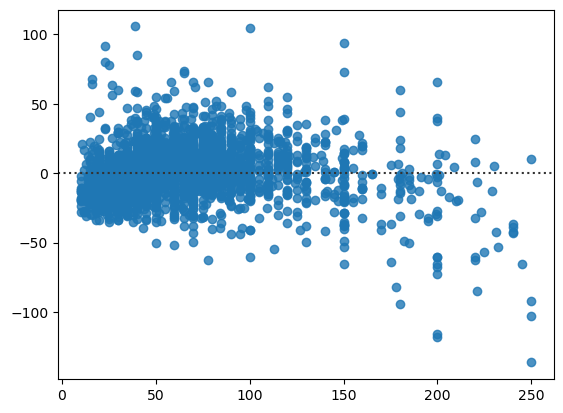

In [102]:
sns.residplot(x=y_test, y=ytestLasso)

El gráfico de residuales muestra que los errores se apiñan bastante en torno al cero y de manera bastante simétrica.

#### Conclusión del modelo Lasso:

Este modelo parece bastante fiable dentro de un rango de predicciones. El error generalizando sobre el buenoprediciendo sólo hasta unos 200€. De usar este modelo en producción hay que puntualizar este rango de uso. El desempeño del modelo mejora respecto a una Regresión polinómica eliminando sólo 2 características frente a las 5 eliminadas a mano en el modelo polinómica. No es mucha mejora, así que entre estos dos modelos Regresores cabría pensar en usar el modelo Polinómico anterior, ya que usa menos features y hace el modelo menos complejo. Sin embargo, calcular el Lasso es infinitamente más rápido que el cálculo de los polinomios, cuyo tiempo de proceso se multiplica al menos por 10 con cada grado de más por cada fold del cross validation. Por esto recomiendo de momento el uso de Lasso hasta ahora.

### -- Modelo RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

leaf_vector = [0.02, 0.01, 0.005, 0.001, 0.0001, 0.00001]
dep_vector = range(10, 16)

param_grid = {'n_estimators': [100], 'min_samples_leaf': leaf_vector, 'max_depth': dep_vector}
grid3 = GridSearchCV(RFR(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid3.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))


Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.02, n_estimators=100; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=7, min_samples_l

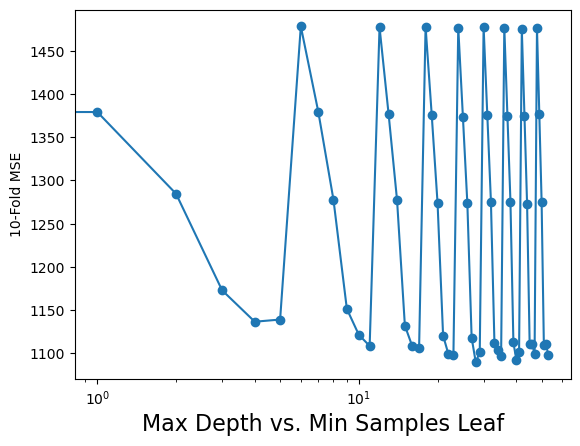

In [153]:
#-1 porque es negado
scores = -1*np.array(grid3.cv_results_['mean_test_score'])
plt.semilogx(scores,'-o')
plt.xlabel('Max Depth vs. Min Samples Leaf',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [154]:
grid3.best_params_

{'max_depth': 11, 'min_samples_leaf': 0.0001, 'n_estimators': 100}

In [156]:
leaf_optimo = grid3.best_params_['min_samples_leaf']
dep_optimo = grid3.best_params_["max_depth"]
rfr = RFR(n_estimators=100, min_samples_leaf=leaf_optimo, max_depth=dep_optimo).fit(XtrainScaled,y_train)

ytrainRFR = rfr.predict(XtrainScaled)
ytestRFR  = rfr.predict(XtestScaled)
mseTrainModelRFR = MSE(y_train,ytrainRFR)
mseTestModelRFR = MSE(y_test,ytestRFR)

print('MSE Modelo Random Forest (train): %0.3g' % mseTrainModelRFR)
print('MSE Modelo Random Forest (test) : %0.3g' % mseTestModelRFR)

print('RMSE Modelo Random Forest (train): %0.3g' % np.sqrt(mseTrainModelRFR))
print('RMSE Modelo Random Forest (test) : %0.3g' % np.sqrt(mseTestModelRFR))

print("Score de Train: ", rfr.score(XtrainScaled,y_train) )
print("Score de Test: ", rfr.score(XtestScaled,y_test) )

MSE Modelo Random Forest (train): 579
MSE Modelo Random Forest (test) : 1.19e+03
RMSE Modelo Random Forest (train): 24.1
RMSE Modelo Random Forest (test) : 34.5
Score de Train:  0.8037257509364009
Score de Test:  0.6355366146314734


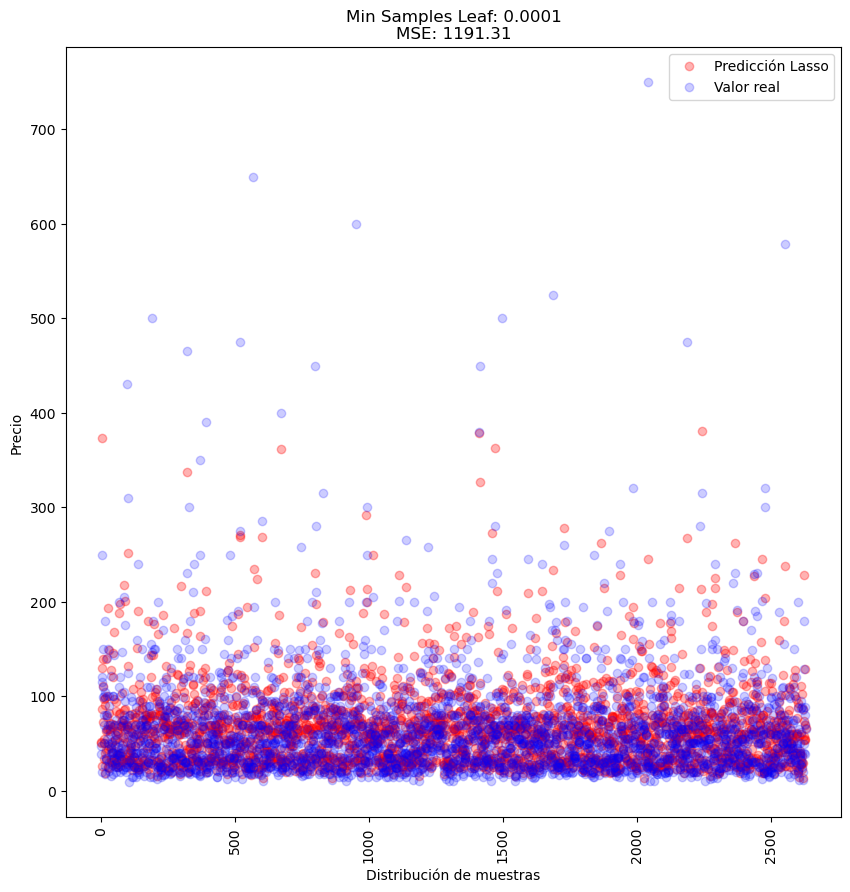

In [157]:
plt.figure(figsize = (10, 10))
plt.plot(yftestRFR, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Lasso')
plt.plot(yf_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'Min Samples Leaf: {leaf_optimo}\nMSE: {mseTestModelRFR:.2f}')
plt.legend()
plt.show()

<Axes: >

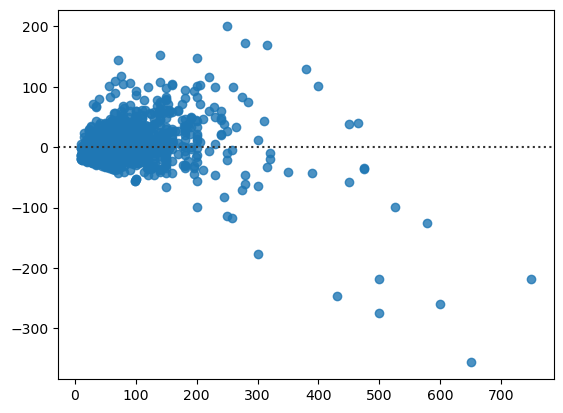

In [158]:
sns.residplot(x=yf_test, y=yftestRFR)

In [159]:
print(f"Ratio de mejora de error del RFR sobre el error del Polinómico en Training es del {round(100 -np.sqrt(mseTrainModelRFR)/np.sqrt(mseTrainModelRegressor)*100,2)}%")
print(f"Ratio de mejora de error del RFR sobre el error del Polinómico generalizando es del {round(100 -np.sqrt(mseTestModelRFR)/np.sqrt(mseTestModelRegressor)*100,2)}%")

Ratio de mejora de error del RFR sobre el error del Polinómico en Training es del 27.94%
Ratio de mejora de error del RFR sobre el error del Polinómico generalizando es del 4.12%


### Conclusiones Modelo RandomForest

##### Este modelo es más rápido de entrenar que el modelo de Regresión Polinómica, y con mejores resultados que los dos modelos anteriores en Training (casi un 20% menor que el ), y ligeramente mejor en Test (un 7.5% menos de error).